# Encoding

In [1]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn                 as sns
import os
from datetime import datetime
import missingno as msng
import calendar
import time
from datetime import date, timedelta, datetime as dt
import re

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [3]:
df = "/content/gdrive/MyDrive/Ejercicios ciencia de datos/dnrpa-robos-recuperos-autos-202201.csv"

#EDA

In [4]:
df = pd.read_csv(df)

In [5]:
df.head()

tramite_tipo tramite_fecha  \
0  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-18   
1  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-31   
2  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-11   
3  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-10   
4  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-24   

  fecha_inscripcion_inicial  registro_seccional_codigo  \
0                1994-06-03                       1173   
1                2000-10-27                       1120   
2                1994-04-28                       2086   
3                1992-03-27                       1119   
4                2000-11-01                       1118   

  registro_seccional_descripcion registro_seccional_provincia  \
0               BERAZATEGUI Nº 2                 Buenos Aires   
1               LA MATANZA Nº 03                 Buenos Aires   
2         CAPITAL FEDERAL Nº 086    Ciudad Autónoma de Bs.As.   
3                    MORON Nº 03                 Buenos Aires   
4                   QUILMES Nº 2                 Buenos Aires   

  automotor_origen  automotor_anio_modelo automotor_tipo_codigo  \
0         Nacional                 1994.0                   NaN   
1         Nacional                 2000.0                   NaN   
2         Nacional                 1994.0                   NaN   
3        Importado                 1991.0                   NaN   
4         Nacional                 2000.0                   NaN   

  automotor_tipo_descripcion  ... automotor_uso_descripcion  \
0       FURGON VIDRID.C/ASIE  ...                   Privado   
1                      SEDAN  ...                   Privado   
2       FUR.VIDRIADO C/ASIEN  ...                   Privado   
3              RURAL 4 PTAS.  ...                   Privado   
4            SEDAN 4 PUERTAS  ...                   Privado   

  titular_tipo_persona titular_domicilio_localidad  \
0               Física                 BERAZATEGUI   
1               Física           LOMAS DEL MIRADOR   
2               Física         C.AUTONOMA DE BS.AS   
3               Física                       HAEDO   
4               Física               QUILMES OESTE   

  titular_domicilio_provincia   titular_genero titular_anio_nacimiento  \
0                BUENOS AIRES        Masculino                    1972   
1                BUENOS AIRES         Femenino                    1991   
2         C.AUTONOMA DE BS.AS        Masculino                    1971   
3                BUENOS AIRES  No identificado                    1982   
4                BUENOS AIRES        Masculino                    1947   

  titular_pais_nacimiento titular_porcentaje_titularidad  \
0               ARGENTINA                            100   
1               ARGENTINA                            100   
2                    PERU                            100   
3               ARGENTINA                             50   
4               ARGENTINA                            100   

  titular_domicilio_provincia_id titular_pais_nacimiento_id  
0                              6                        ARG  
1                              6                        ARG  
2                              2                        NaN  
3                              6                        ARG  
4                              6                        ARG  

[5 rows x 25 columns]

In [6]:
df.describe()

registro_seccional_codigo  automotor_anio_modelo  automotor_uso_codigo  \
count                2676.000000            2671.000000           2676.000000   
mean                 3519.189462            2006.236615              1.011958   
std                  5187.429542              39.245632              0.180981   
min                  1001.000000              20.000000              1.000000   
25%                  1161.000000            2000.000000              1.000000   
50%                  1249.000000            2008.000000              1.000000   
75%                  2071.000000            2013.000000              1.000000   
max                 24007.000000            2021.000000              9.000000   

       titular_anio_nacimiento  titular_porcentaje_titularidad  \
count              2676.000000                     2676.000000   
mean               1978.030643                       97.482063   
std                  14.265932                       11.078111   
min                1909.000000                        1.000000   
25%                1969.000000                      100.000000   
50%                1979.000000                      100.000000   
75%                1989.000000                      100.000000   
max                2020.000000                      100.000000   

       titular_domicilio_provincia_id  
count                     2676.000000  
mean                        13.668161  
std                         20.038928  
min                          2.000000  
25%                          6.000000  
50%                          6.000000  
75%                          6.000000  
max                         94.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tramite_tipo                    2676 non-null   object 
 1   tramite_fecha                   2676 non-null   object 
 2   fecha_inscripcion_inicial       2676 non-null   object 
 3   registro_seccional_codigo       2676 non-null   int64  
 4   registro_seccional_descripcion  2676 non-null   object 
 5   registro_seccional_provincia    2676 non-null   object 
 6   automotor_origen                2676 non-null   object 
 7   automotor_anio_modelo           2671 non-null   float64
 8   automotor_tipo_codigo           2601 non-null   object 
 9   automotor_tipo_descripcion      2676 non-null   object 
 10  automotor_marca_codigo          2644 non-null   object 
 11  automotor_marca_descripcion     2676 non-null   object 
 12  automotor_modelo_codigo         26

<Axes: >

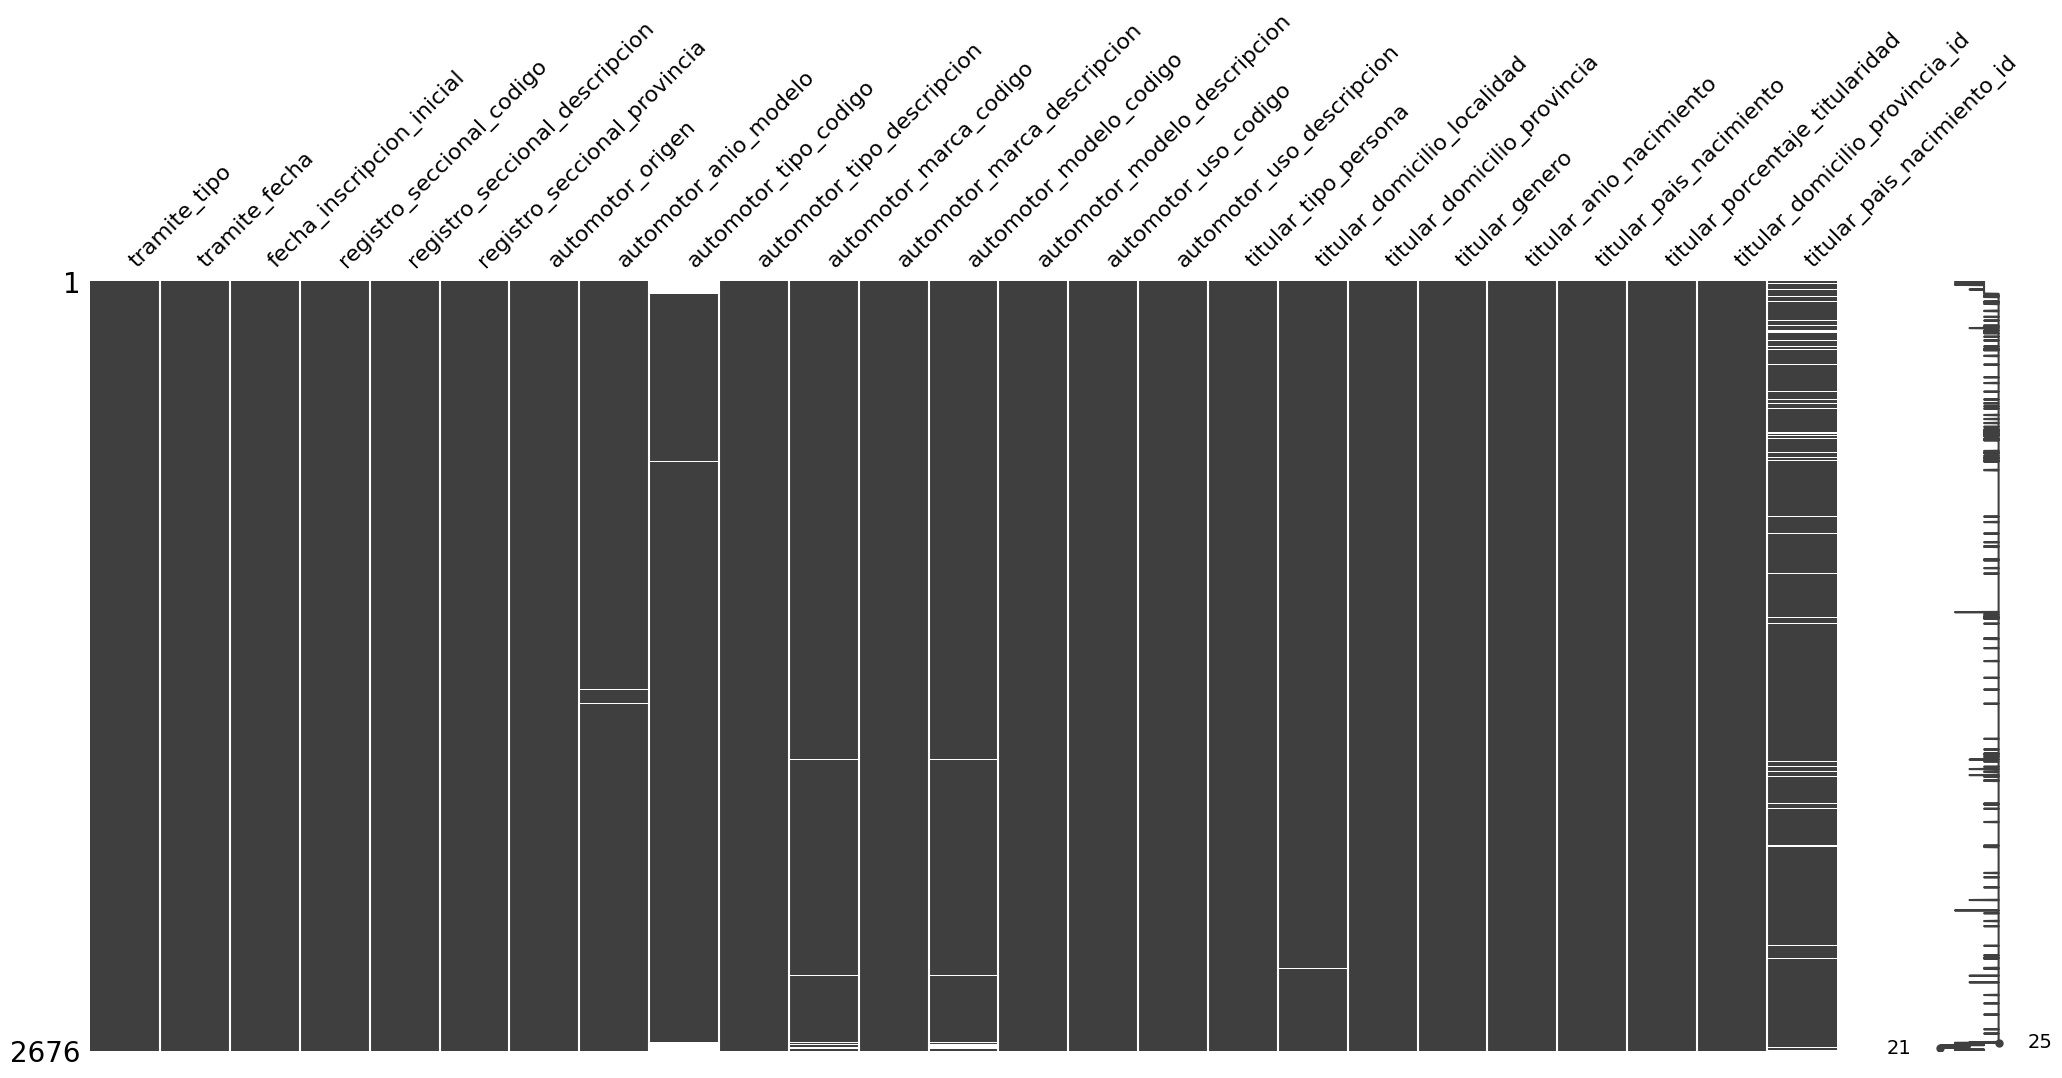

In [8]:
msng.matrix(df)

# Ingeniería de atributos

##Dimensiones

*  tramite_tipo
*  registro_seccional_codigo
*  registro_seccional_descripcion
*  registro_seccional_provincia
*  automotor_origen
*  automotor_tipo_codigo
*  automotor_tipo_descripcion
*  automotor_marca_codigo          
*  automotor_marca_descripcion     
*  automotor_modelo_codigo         
*  automotor_uso_codigo            
*  automotor_uso_descripcion
*  titular_tipo_persona
*  titular_domicilio_localidad
*  titular_domicilio_provincia
*  titular_genero
*  titular_pais_nacimiento
*  titular_domicilio_provincia_id
*  titular_pais_nacimiento_id

##Medidas

*  tramite_fecha
*  fecha_inscripcion_inicial
*  automotor_anio_modelo
*  titular_anio_nacimiento
*  titular_porcentaje_titularidad


In [9]:
# Contar % de datos nulos

porcentaje_nulos = df.isnull().mean() * 100

# Mostrar el resultado
print(porcentaje_nulos)

tramite_tipo                      0.000000
tramite_fecha                     0.000000
fecha_inscripcion_inicial         0.000000
registro_seccional_codigo         0.000000
registro_seccional_descripcion    0.000000
registro_seccional_provincia      0.000000
automotor_origen                  0.000000
automotor_anio_modelo             0.186846
automotor_tipo_codigo             2.802691
automotor_tipo_descripcion        0.000000
automotor_marca_codigo            1.195815
automotor_marca_descripcion       0.000000
automotor_modelo_codigo           1.345291
automotor_modelo_descripcion      0.000000
automotor_uso_codigo              0.000000
automotor_uso_descripcion         0.000000
titular_tipo_persona              0.000000
titular_domicilio_localidad       0.074738
titular_domicilio_provincia       0.000000
titular_genero                    0.000000
titular_anio_nacimiento           0.000000
titular_pais_nacimiento           0.000000
titular_porcentaje_titularidad    0.000000
titular_dom

In [10]:
#Transformar variables

df['tramite_fecha'] = pd.to_datetime(df['tramite_fecha'])
df['fecha_inscripcion_inicial'] = pd.to_datetime(df['fecha_inscripcion_inicial'])


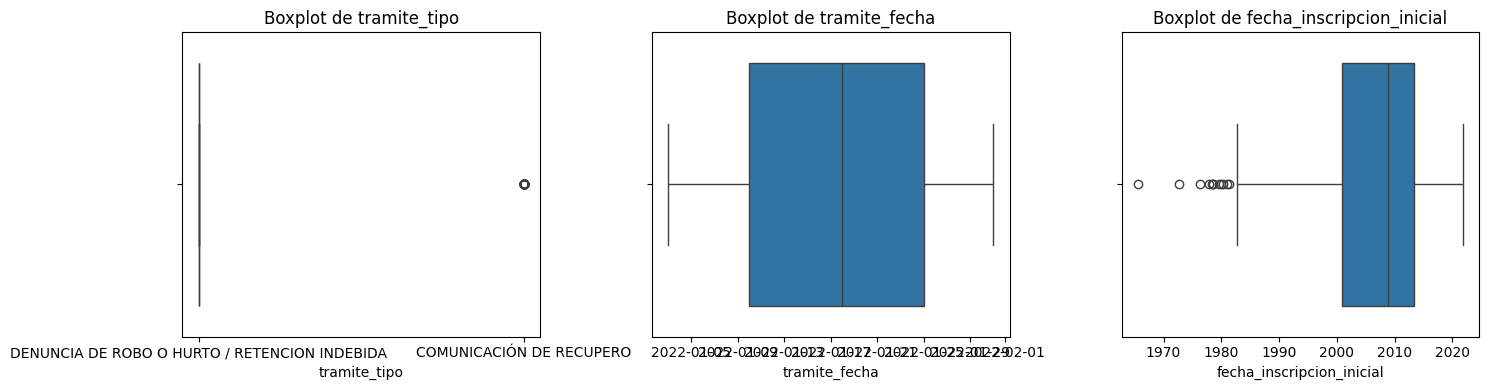

In [11]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Boxplot para la columna tramite_tipo
sns.boxplot(ax=axes[0], x="tramite_tipo", data=df)
axes[0].set_xlabel('tramite_tipo')
axes[0].set_title('Boxplot de tramite_tipo')

# Boxplot para la columna tramite_fecha
sns.boxplot(ax=axes[1], x="tramite_fecha", data=df)
axes[1].set_xlabel('tramite_fecha')
axes[1].set_title('Boxplot de tramite_fecha')

# Boxplot para la columna fecha_inscripcion_inicial
sns.boxplot(ax=axes[2], x="fecha_inscripcion_inicial", data=df)
axes[2].set_xlabel('fecha_inscripcion_inicial')
axes[2].set_title('Boxplot de fecha_inscripcion_inicial')

# Ajustar el espacio entre los subplots
plt.tight_layout()


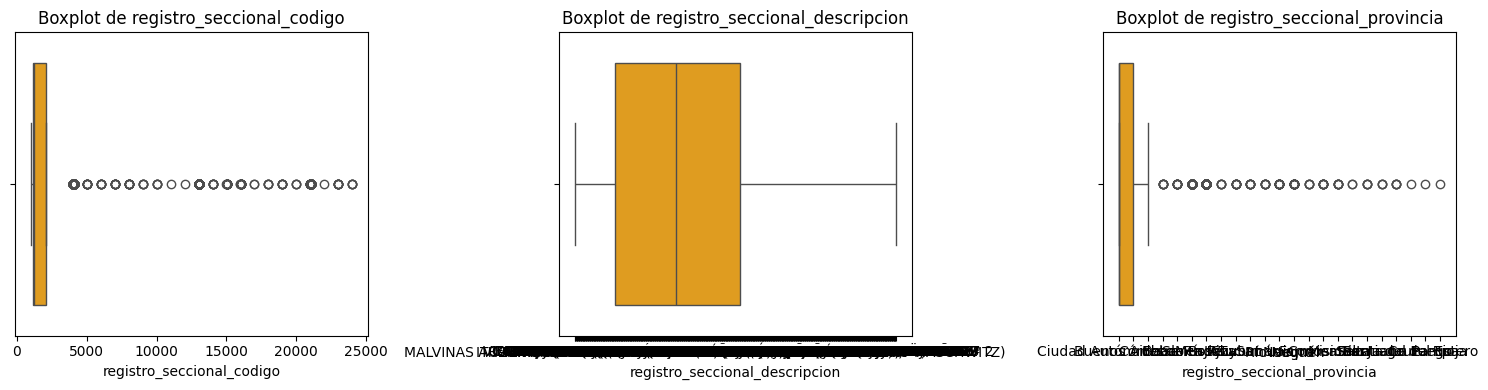

In [12]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Boxplot para la columna registro_seccional_codigo
sns.boxplot(ax=axes[0], x="registro_seccional_codigo", data=df, color='orange')
axes[0].set_xlabel('registro_seccional_codigo')
axes[0].set_title('Boxplot de registro_seccional_codigo')

# Boxplot para la columna registro_seccional_descripcion
sns.boxplot(ax=axes[1], x="registro_seccional_descripcion", data=df, color='orange')
axes[1].set_xlabel('registro_seccional_descripcion')
axes[1].set_title('Boxplot de registro_seccional_descripcion')

# Boxplot para la columna registro_seccional_provincia
sns.boxplot(ax=axes[2], x="registro_seccional_provincia", data=df, color='orange')
axes[2].set_xlabel('registro_seccional_provincia')
axes[2].set_title('Boxplot de registro_seccional_provincia')

# Ajustar el espacio entre los subplots
plt.tight_layout()

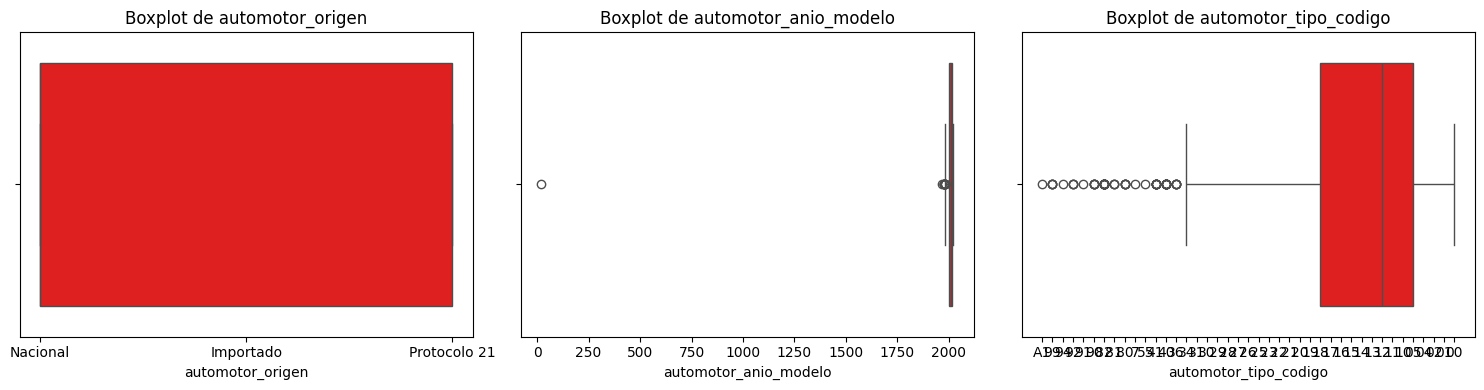

In [13]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Boxplot para la columna automotor_origen
sns.boxplot(ax=axes[0], x="automotor_origen", data=df, color='red')
axes[0].set_xlabel('automotor_origen')
axes[0].set_title('Boxplot de automotor_origen')

# Boxplot para la columna automotor_anio_modelo
sns.boxplot(ax=axes[1], x="automotor_anio_modelo", data=df, color='red')
axes[1].set_xlabel('automotor_anio_modelo')
axes[1].set_title('Boxplot de automotor_anio_modelo')

# Boxplot para la columna automotor_tipo_codigo
sns.boxplot(ax=axes[2], x="automotor_tipo_codigo", data=df, color='red')
axes[2].set_xlabel('automotor_tipo_codigo')
axes[2].set_title('Boxplot de automotor_tipo_codigo')

# Ajustar el espacio entre los subplots
plt.tight_layout()

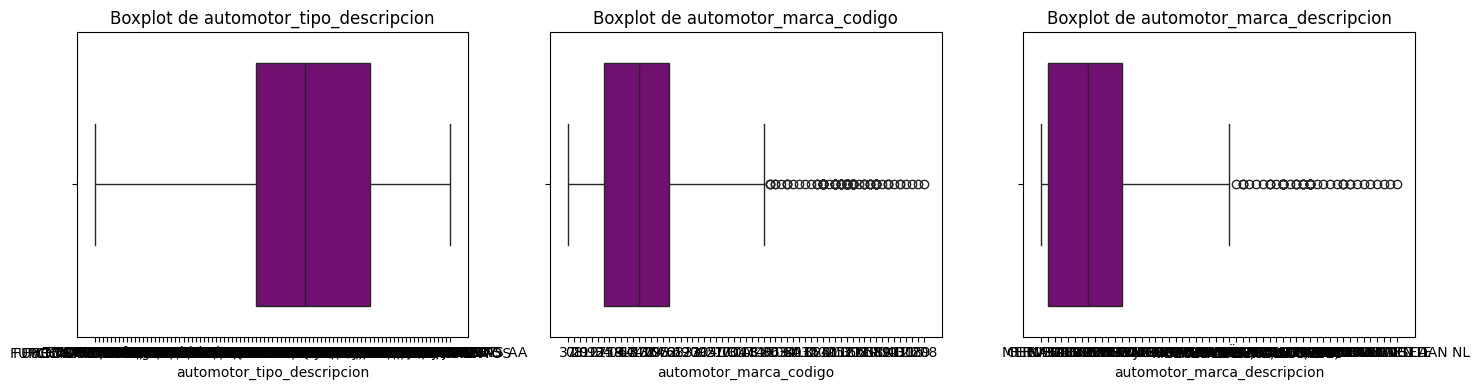

In [14]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Boxplot para la columna automotor_tipo_descripcion
sns.boxplot(ax=axes[0], x="automotor_tipo_descripcion", data=df, color='purple')
axes[0].set_xlabel('automotor_tipo_descripcion')
axes[0].set_title('Boxplot de automotor_tipo_descripcion')

# Boxplot para la columna automotor_marca_codigo
sns.boxplot(ax=axes[1], x="automotor_marca_codigo", data=df, color='purple')
axes[1].set_xlabel('automotor_marca_codigo')
axes[1].set_title('Boxplot de automotor_marca_codigo')

# Boxplot para la columna automotor_marca_descripcion
sns.boxplot(ax=axes[2], x="automotor_marca_descripcion", data=df, color='purple')
axes[2].set_xlabel('automotor_marca_descripcion')
axes[2].set_title('Boxplot de automotor_marca_descripcion')

# Ajustar el espacio entre los subplots
plt.tight_layout()

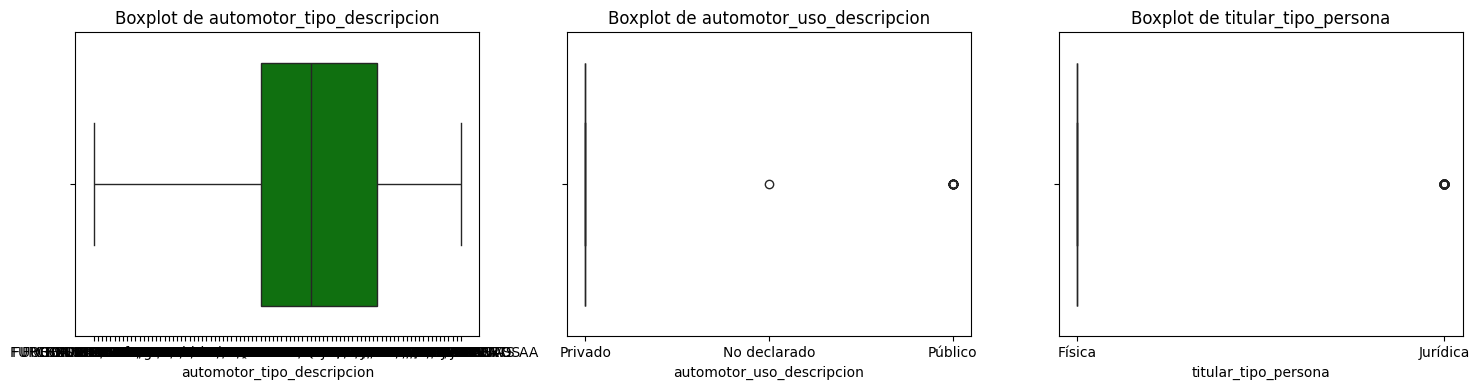

In [15]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Boxplot para la columna automotor_uso_codigo
sns.boxplot(ax=axes[0], x="automotor_tipo_descripcion", data=df, color='green')
axes[0].set_xlabel('automotor_tipo_descripcion')
axes[0].set_title('Boxplot de automotor_tipo_descripcion')

# Boxplot para la columna automotor_uso_descripcion
sns.boxplot(ax=axes[1], x="automotor_uso_descripcion", data=df, color='green')
axes[1].set_xlabel('automotor_uso_descripcion')
axes[1].set_title('Boxplot de automotor_uso_descripcion')

# Boxplot para la columna titular_tipo_persona
sns.boxplot(ax=axes[2], x="titular_tipo_persona", data=df, color='green')
axes[2].set_xlabel('titular_tipo_persona')
axes[2].set_title('Boxplot de titular_tipo_persona')

# Ajustar el espacio entre los subplots
plt.tight_layout()

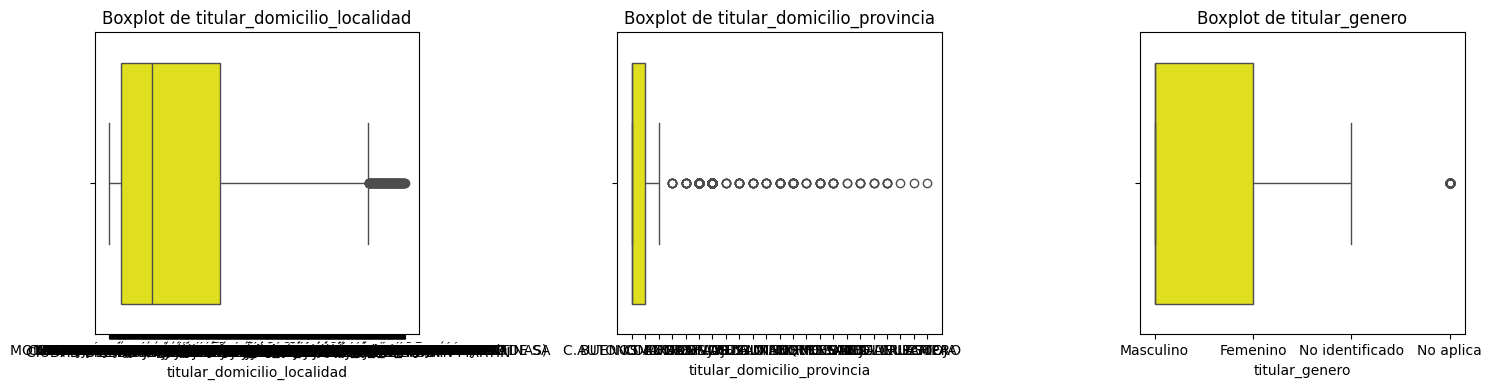

In [16]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Boxplot para la columna titular_domicilio_localidad
sns.boxplot(ax=axes[0], x="titular_domicilio_localidad", data=df, color='yellow')
axes[0].set_xlabel('titular_domicilio_localidad')
axes[0].set_title('Boxplot de titular_domicilio_localidad')

# Boxplot para la columna titular_domicilio_provincia
sns.boxplot(ax=axes[1], x="titular_domicilio_provincia", data=df, color='yellow')
axes[1].set_xlabel('titular_domicilio_provincia')
axes[1].set_title('Boxplot de titular_domicilio_provincia')

# Boxplot para la columna titular_genero
sns.boxplot(ax=axes[2], x="titular_genero", data=df, color='yellow')
axes[2].set_xlabel('titular_genero')
axes[2].set_title('Boxplot de titular_genero')

# Ajustar el espacio entre los subplots
plt.tight_layout()

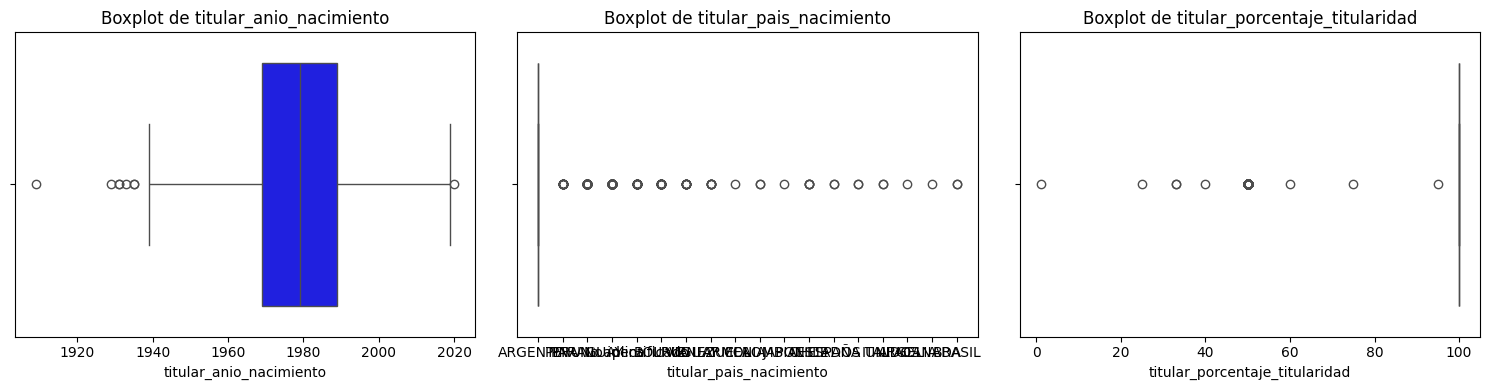

In [17]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Boxplot para la columna titular_anio_nacimiento
sns.boxplot(ax=axes[0], x="titular_anio_nacimiento", data=df, color='blue')
axes[0].set_xlabel('titular_anio_nacimiento')
axes[0].set_title('Boxplot de titular_anio_nacimiento')

# Boxplot para la columna titular_pais_nacimiento
sns.boxplot(ax=axes[1], x="titular_pais_nacimiento", data=df, color='blue')
axes[1].set_xlabel('titular_pais_nacimiento')
axes[1].set_title('Boxplot de titular_pais_nacimiento')

# Boxplot para la columna titular_porcentaje_titularidad
sns.boxplot(ax=axes[2], x="titular_porcentaje_titularidad", data=df, color='blue')
axes[2].set_xlabel('titular_porcentaje_titularidad')
axes[2].set_title('Boxplot de titular_porcentaje_titularidad')

# Ajustar el espacio entre los subplots
plt.tight_layout()

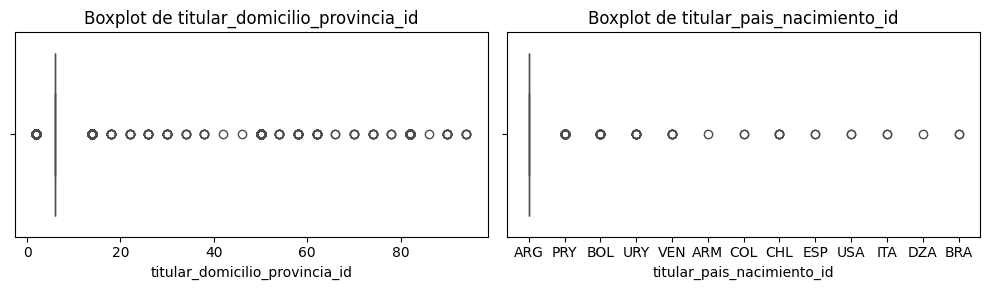

In [18]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Boxplot para la columna titular_domicilio_provincia_id
sns.boxplot(ax=axes[0], x="titular_domicilio_provincia_id", data=df, color='orange')
axes[0].set_xlabel('titular_domicilio_provincia_id')
axes[0].set_title('Boxplot de titular_domicilio_provincia_id')

# Boxplot para la columna titular_pais_nacimiento_id
sns.boxplot(ax=axes[1], x="titular_pais_nacimiento_id", data=df, color='orange')
axes[1].set_xlabel('titular_pais_nacimiento_id')
axes[1].set_title('Boxplot de titular_pais_nacimiento_id')

# Ajustar el espacio entre los subplots
plt.tight_layout()

In [19]:
# Cambiar los valores NaN por la mediana de la columna, sólo se rellenan las columnas deseadas

moda_1 = df['automotor_anio_modelo'].mode()[0]
df['automotor_anio_modelo'].fillna(moda_1, inplace=True)

moda_2 = df['automotor_tipo_codigo'].mode()[0]
df['automotor_tipo_codigo'].fillna(moda_2, inplace=True)

moda_3 = df['automotor_marca_codigo'].mode()[0]
df['automotor_marca_codigo'].fillna(moda_3, inplace=True)

moda_4 = df['titular_domicilio_localidad'].mode()[0]
df['titular_domicilio_localidad'].fillna(moda_4, inplace=True)

moda_5 = df['titular_pais_nacimiento_id'].mode()[0]
df['titular_pais_nacimiento_id'].fillna(moda_5, inplace=True)

moda_6 = df['automotor_modelo_codigo'].mode()[0]
df['automotor_modelo_codigo'].fillna(moda_6, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tramite_tipo                    2676 non-null   object        
 1   tramite_fecha                   2676 non-null   datetime64[ns]
 2   fecha_inscripcion_inicial       2676 non-null   datetime64[ns]
 3   registro_seccional_codigo       2676 non-null   int64         
 4   registro_seccional_descripcion  2676 non-null   object        
 5   registro_seccional_provincia    2676 non-null   object        
 6   automotor_origen                2676 non-null   object        
 7   automotor_anio_modelo           2676 non-null   float64       
 8   automotor_tipo_codigo           2676 non-null   object        
 9   automotor_tipo_descripcion      2676 non-null   object        
 10  automotor_marca_codigo          2676 non-null   object        
 11  auto

In [21]:
# Contar % de datos nulos

porcentaje_nulos = df.isnull().mean() * 100

# Mostrar el resultado
print(porcentaje_nulos)

tramite_tipo                      0.0
tramite_fecha                     0.0
fecha_inscripcion_inicial         0.0
registro_seccional_codigo         0.0
registro_seccional_descripcion    0.0
registro_seccional_provincia      0.0
automotor_origen                  0.0
automotor_anio_modelo             0.0
automotor_tipo_codigo             0.0
automotor_tipo_descripcion        0.0
automotor_marca_codigo            0.0
automotor_marca_descripcion       0.0
automotor_modelo_codigo           0.0
automotor_modelo_descripcion      0.0
automotor_uso_codigo              0.0
automotor_uso_descripcion         0.0
titular_tipo_persona              0.0
titular_domicilio_localidad       0.0
titular_domicilio_provincia       0.0
titular_genero                    0.0
titular_anio_nacimiento           0.0
titular_pais_nacimiento           0.0
titular_porcentaje_titularidad    0.0
titular_domicilio_provincia_id    0.0
titular_pais_nacimiento_id        0.0
dtype: float64


In [22]:
df['tramite_fecha'] = pd.to_datetime(df['tramite_fecha'])

# Crear nuevas columnas con año, mes y día de la columna tramite_fecha
df['anho_tramite_fecha'] = df['tramite_fecha'].dt.year
df['mes_tramite_fecha'] = df['tramite_fecha'].dt.month
df['dia_tramite_fecha'] = df['tramite_fecha'].dt.day

In [23]:
df['fecha_inscripcion_inicial'] = pd.to_datetime(df['fecha_inscripcion_inicial'])

# Crear nuevas columnas con año, mes y día de la columna fecha_inscripcion_inicial
df['anho_fecha_inscripcion_inicial'] = df['fecha_inscripcion_inicial'].dt.year
df['mes_fecha_inscripcion_inicial'] = df['fecha_inscripcion_inicial'].dt.month
df['dia_fecha_inscripcion_inicial'] = df['fecha_inscripcion_inicial'].dt.day

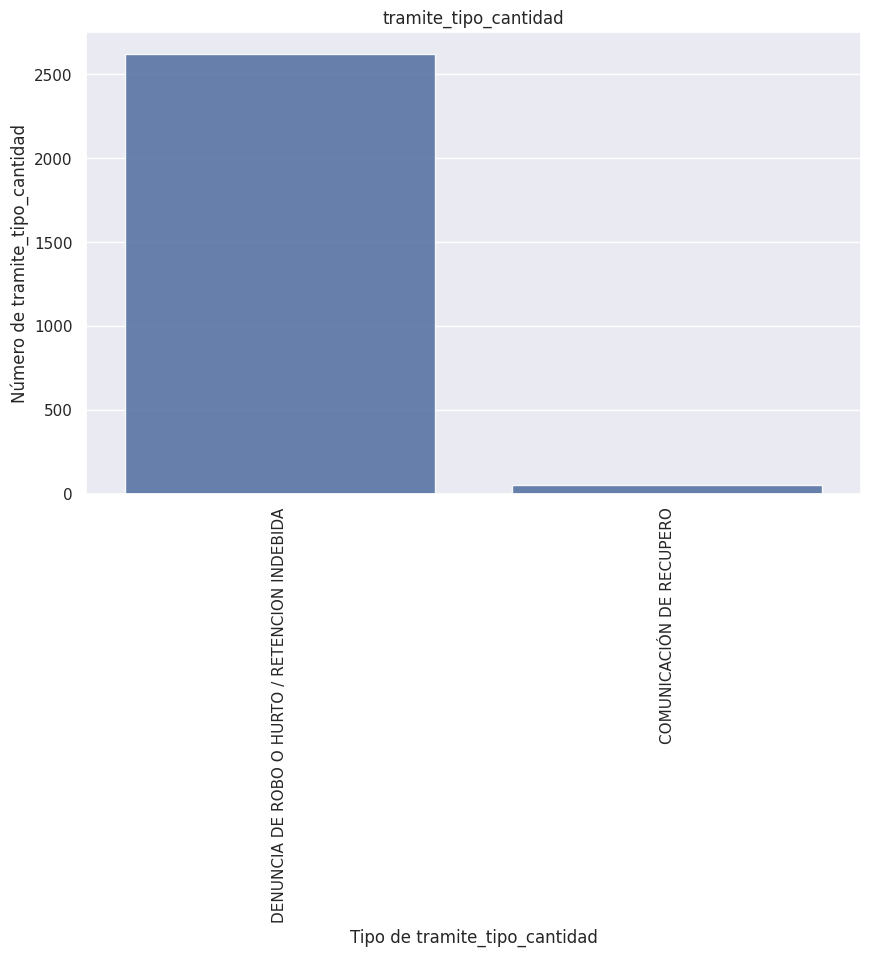

In [24]:
tramite_tipo_cantidad = df['tramite_tipo'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=tramite_tipo_cantidad.index, y=tramite_tipo_cantidad.values, alpha=0.9)
plt.title('tramite_tipo_cantidad')
plt.ylabel('Número de tramite_tipo_cantidad', fontsize=12)
plt.xlabel('Tipo de tramite_tipo_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

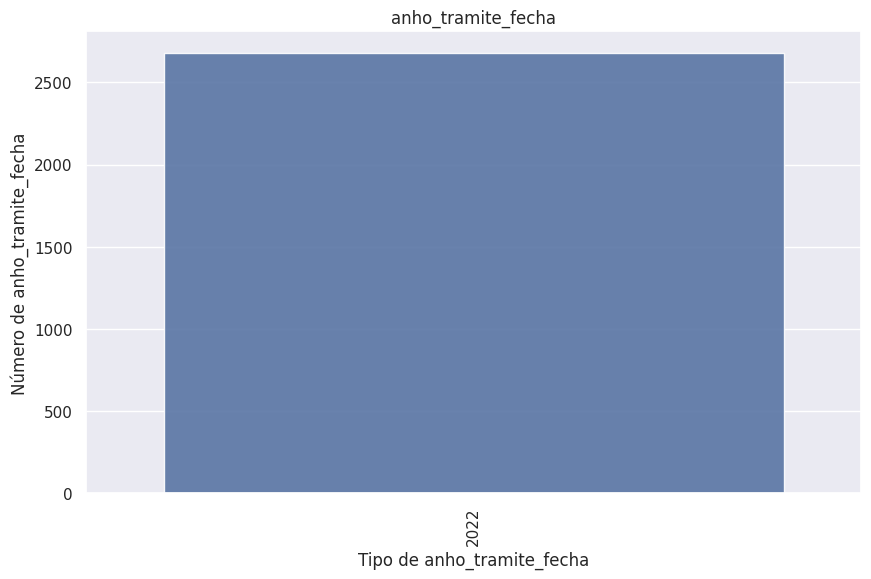

In [25]:
anho_tramite_fecha_cantidad = df['anho_tramite_fecha'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=anho_tramite_fecha_cantidad.index, y=anho_tramite_fecha_cantidad.values, alpha=0.9)
plt.title('anho_tramite_fecha')
plt.ylabel('Número de anho_tramite_fecha', fontsize=12)
plt.xlabel('Tipo de anho_tramite_fecha', fontsize=12)
plt.xticks(rotation=90)
plt.show()

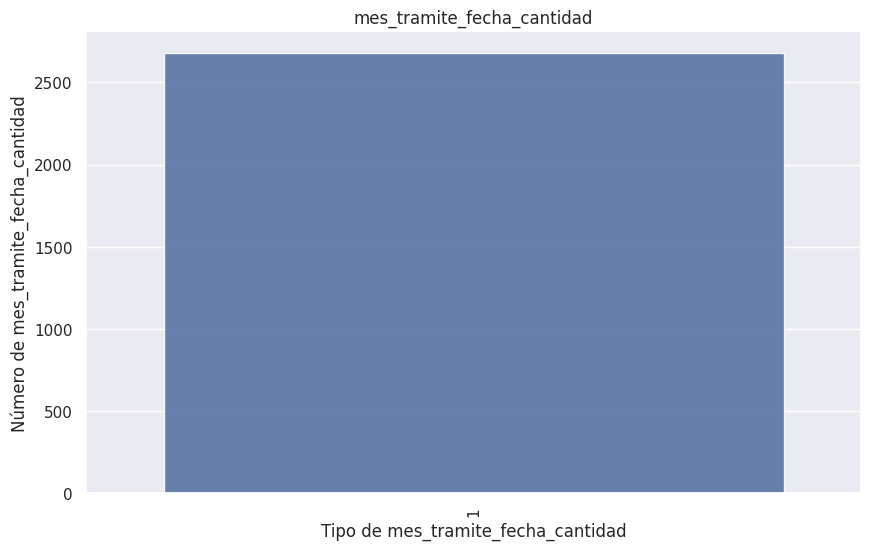

In [26]:
mes_tramite_fecha_cantidad = df['mes_tramite_fecha'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=mes_tramite_fecha_cantidad.index, y=mes_tramite_fecha_cantidad.values, alpha=0.9)
plt.title('mes_tramite_fecha_cantidad')
plt.ylabel('Número de mes_tramite_fecha_cantidad', fontsize=12)
plt.xlabel('Tipo de mes_tramite_fecha_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

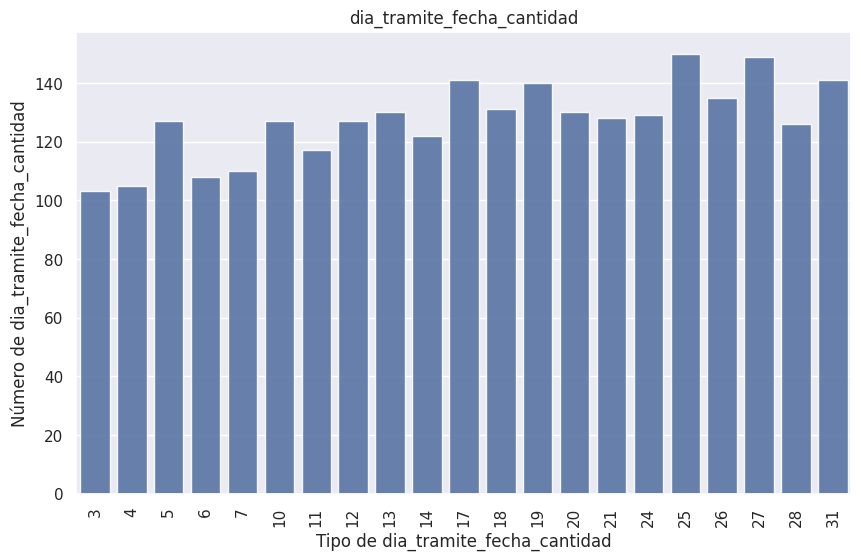

In [27]:
dia_tramite_fecha_cantidad = df['dia_tramite_fecha'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=dia_tramite_fecha_cantidad.index, y=dia_tramite_fecha_cantidad.values, alpha=0.9)
plt.title('dia_tramite_fecha_cantidad')
plt.ylabel('Número de dia_tramite_fecha_cantidad', fontsize=12)
plt.xlabel('Tipo de dia_tramite_fecha_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

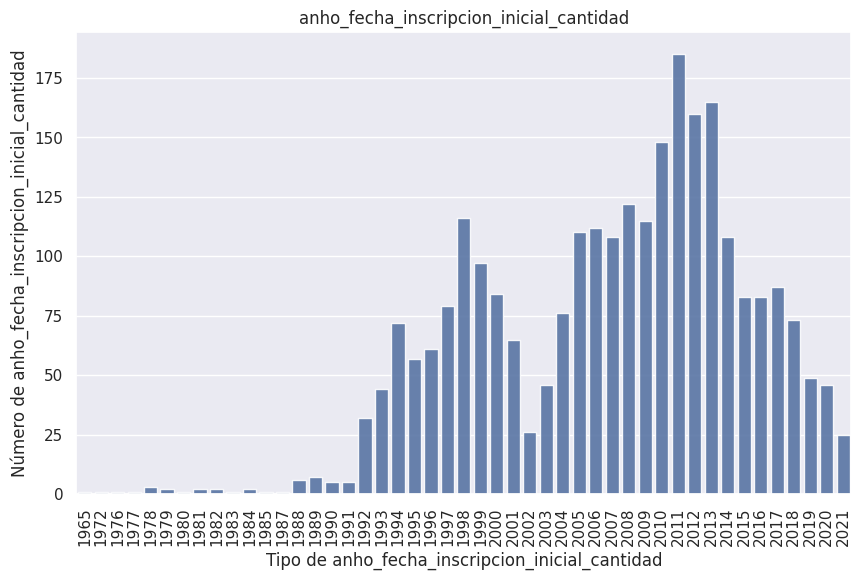

In [28]:
anho_fecha_inscripcion_inicial_cantidad = df['anho_fecha_inscripcion_inicial'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=anho_fecha_inscripcion_inicial_cantidad.index, y=anho_fecha_inscripcion_inicial_cantidad.values, alpha=0.9)
plt.title('anho_fecha_inscripcion_inicial_cantidad')
plt.ylabel('Número de anho_fecha_inscripcion_inicial_cantidad', fontsize=12)
plt.xlabel('Tipo de anho_fecha_inscripcion_inicial_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

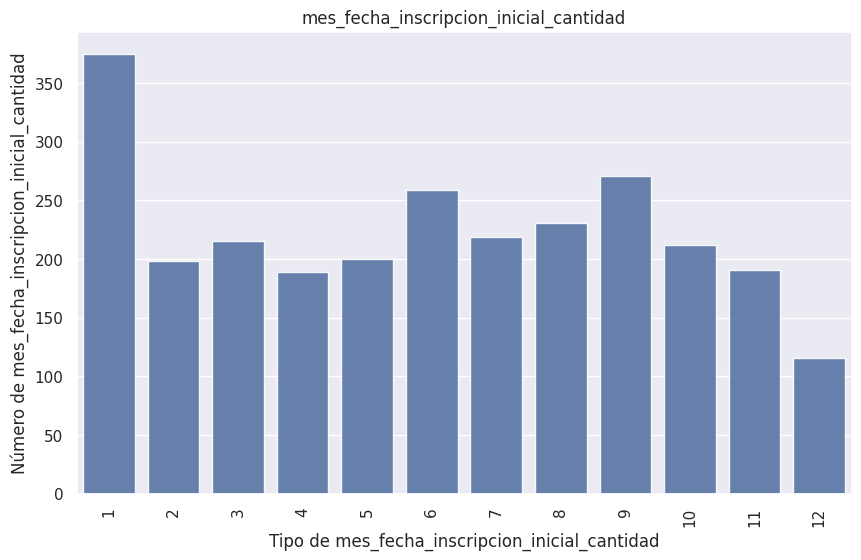

In [29]:
mes_fecha_inscripcion_inicial_cantidad = df['mes_fecha_inscripcion_inicial'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=mes_fecha_inscripcion_inicial_cantidad.index, y=mes_fecha_inscripcion_inicial_cantidad.values, alpha=0.9)
plt.title('mes_fecha_inscripcion_inicial_cantidad')
plt.ylabel('Número de mes_fecha_inscripcion_inicial_cantidad', fontsize=12)
plt.xlabel('Tipo de mes_fecha_inscripcion_inicial_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

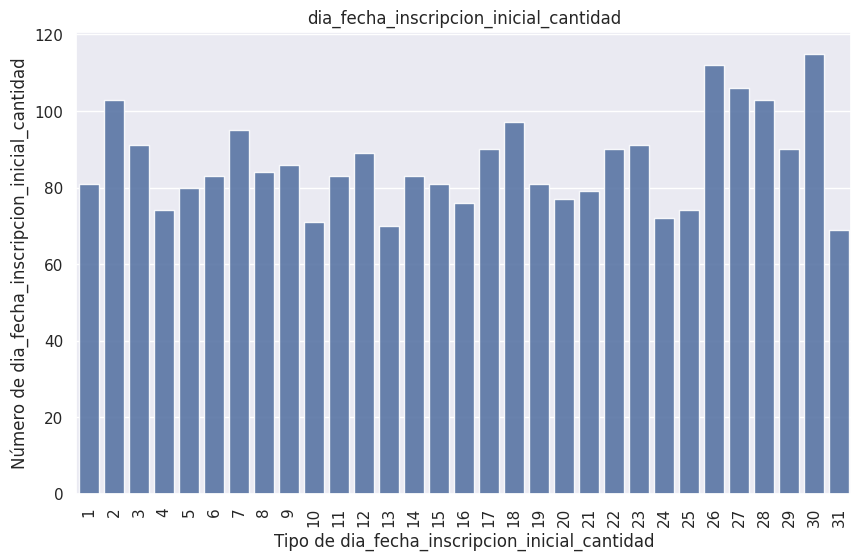

In [30]:
dia_fecha_inscripcion_inicial_cantidad = df['dia_fecha_inscripcion_inicial'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=dia_fecha_inscripcion_inicial_cantidad.index, y=dia_fecha_inscripcion_inicial_cantidad.values, alpha=0.9)
plt.title('dia_fecha_inscripcion_inicial_cantidad')
plt.ylabel('Número de dia_fecha_inscripcion_inicial_cantidad', fontsize=12)
plt.xlabel('Tipo de dia_fecha_inscripcion_inicial_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

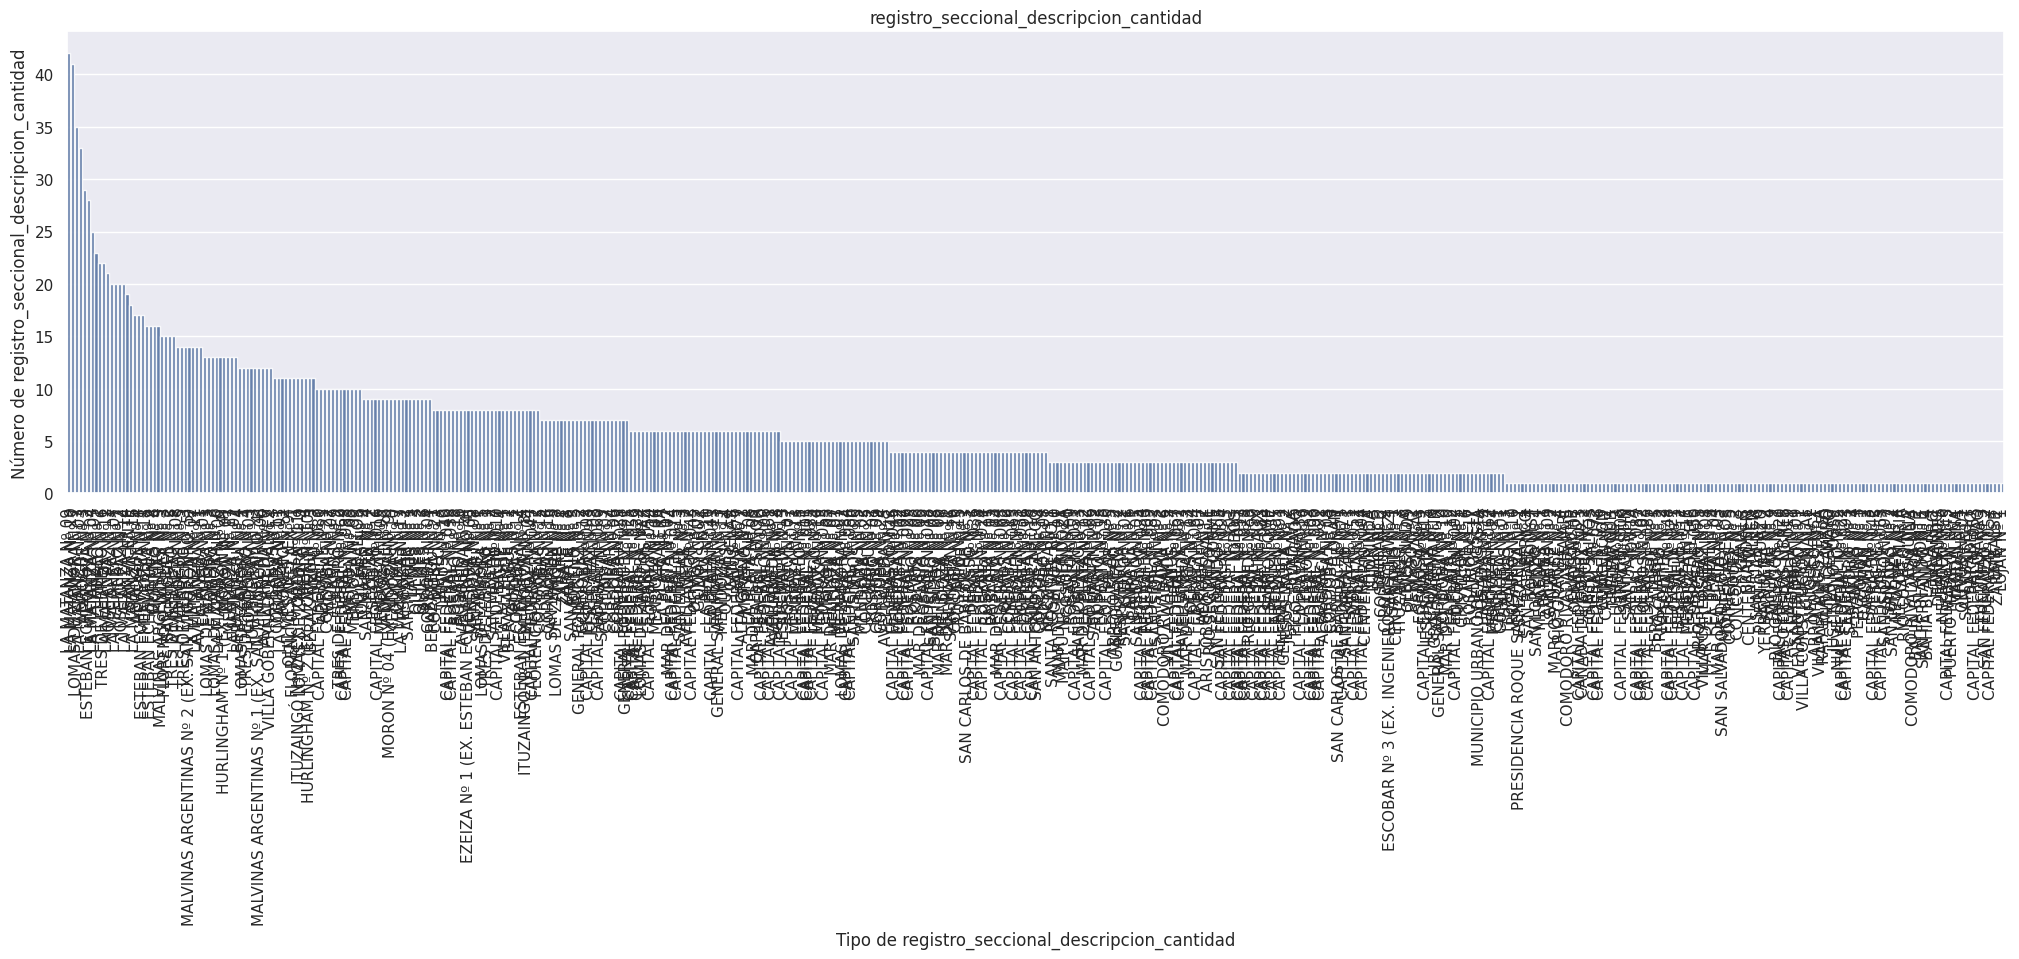

In [31]:
registro_seccional_descripcion_cantidad = df['registro_seccional_descripcion'].value_counts()
plt.figure(figsize=(25, 6))
sns.set(style="darkgrid")
sns.barplot(x=registro_seccional_descripcion_cantidad.index, y=registro_seccional_descripcion_cantidad.values, alpha=0.9)
plt.title('registro_seccional_descripcion_cantidad')
plt.ylabel('Número de registro_seccional_descripcion_cantidad', fontsize=12)
plt.xlabel('Tipo de registro_seccional_descripcion_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

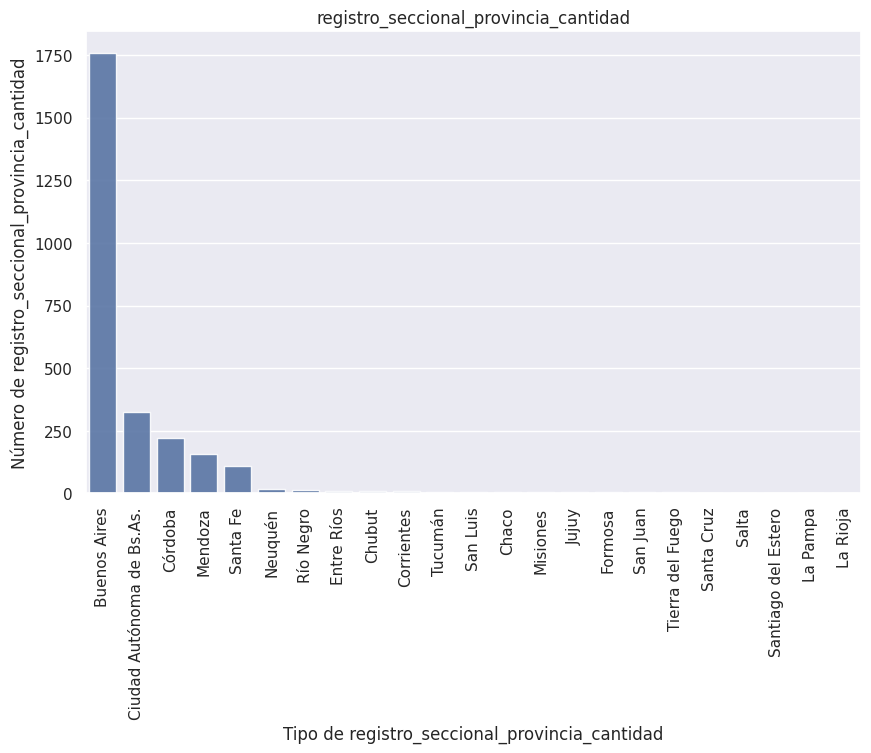

In [32]:
registro_seccional_provincia_cantidad = df['registro_seccional_provincia'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=registro_seccional_provincia_cantidad.index, y=registro_seccional_provincia_cantidad.values, alpha=0.9)
plt.title('registro_seccional_provincia_cantidad')
plt.ylabel('Número de registro_seccional_provincia_cantidad', fontsize=12)
plt.xlabel('Tipo de registro_seccional_provincia_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

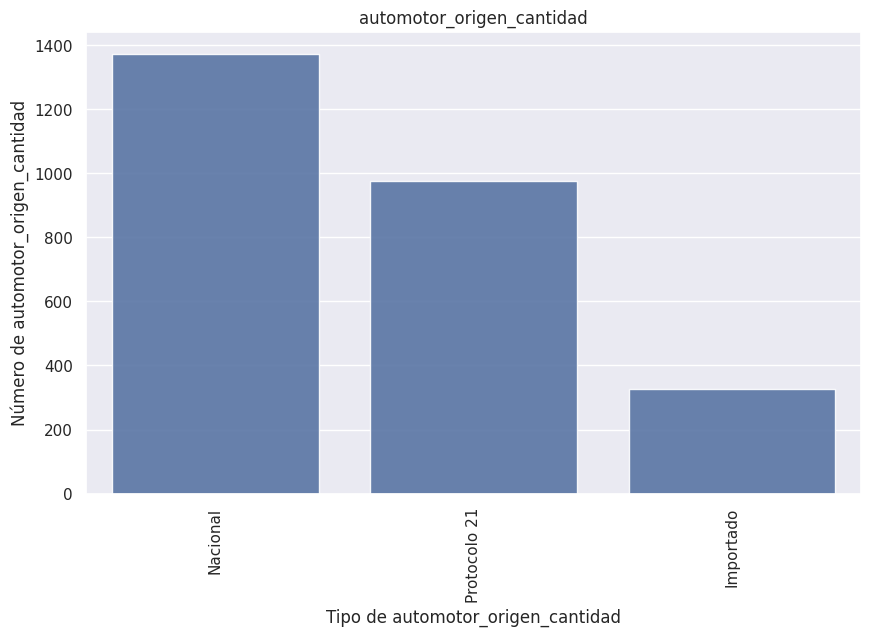

In [33]:
automotor_origen_cantidad = df['automotor_origen'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=automotor_origen_cantidad.index, y=automotor_origen_cantidad.values, alpha=0.9)
plt.title('automotor_origen_cantidad')
plt.ylabel('Número de automotor_origen_cantidad', fontsize=12)
plt.xlabel('Tipo de automotor_origen_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

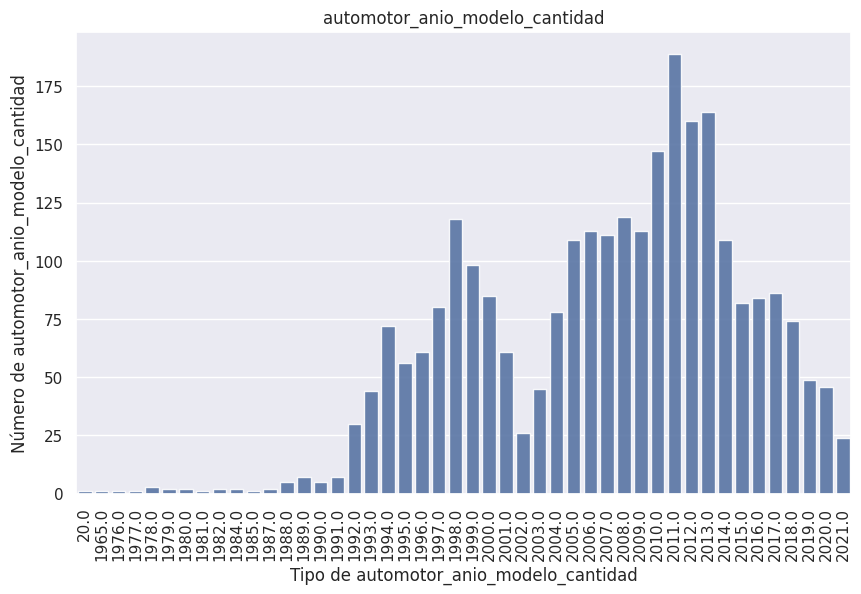

In [34]:
automotor_anio_modelo_cantidad = df['automotor_anio_modelo'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=automotor_anio_modelo_cantidad.index, y=automotor_anio_modelo_cantidad.values, alpha=0.9)
plt.title('automotor_anio_modelo_cantidad')
plt.ylabel('Número de automotor_anio_modelo_cantidad', fontsize=12)
plt.xlabel('Tipo de automotor_anio_modelo_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

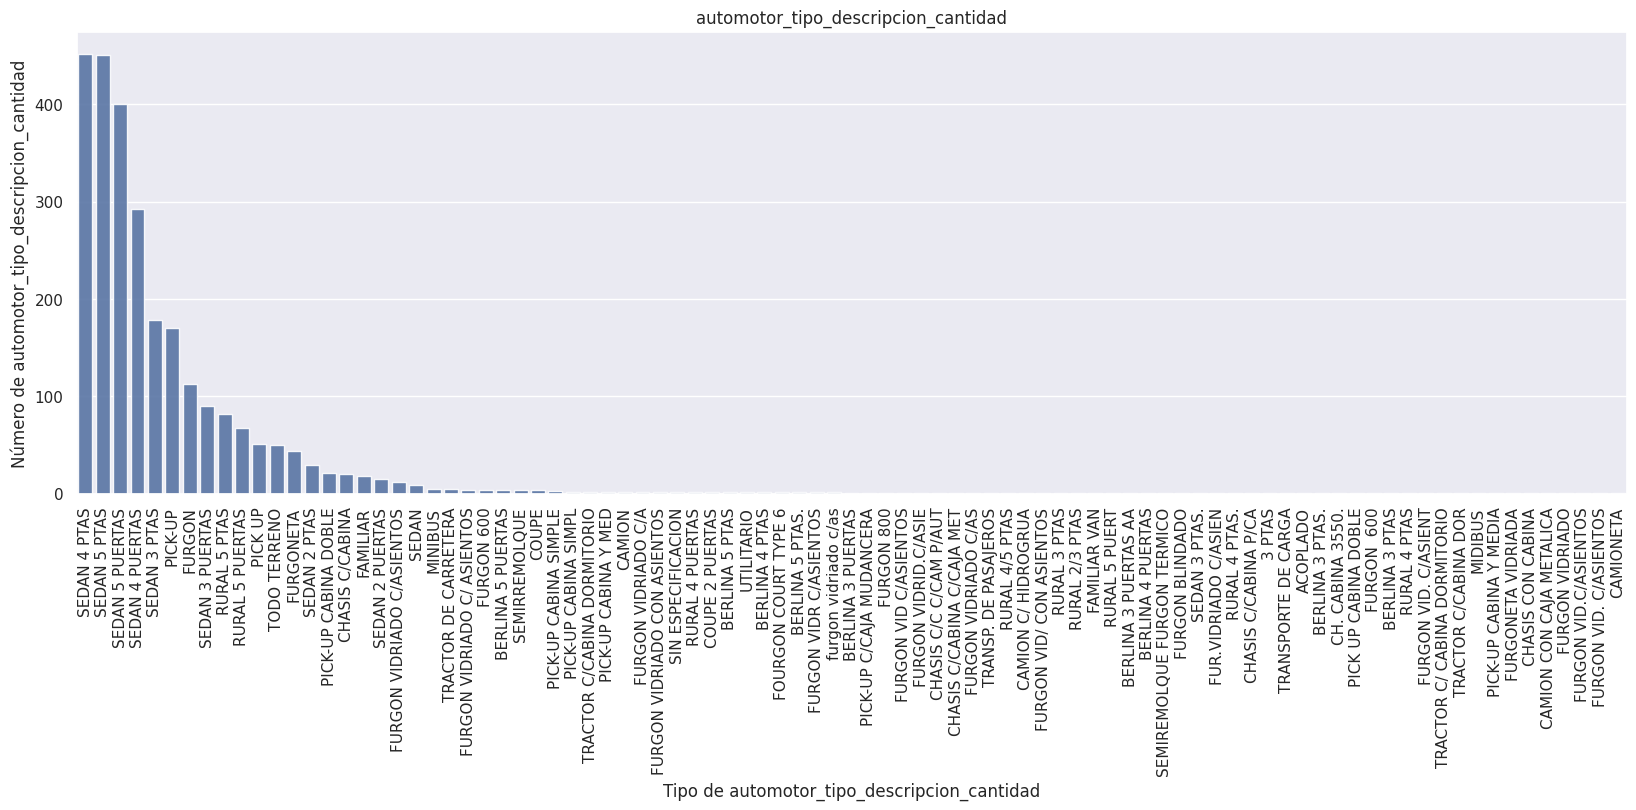

In [35]:
automotor_tipo_descripcion_cantidad = df['automotor_tipo_descripcion'].value_counts()
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
sns.barplot(x=automotor_tipo_descripcion_cantidad.index, y=automotor_tipo_descripcion_cantidad.values, alpha=0.9)
plt.title('automotor_tipo_descripcion_cantidad')
plt.ylabel('Número de automotor_tipo_descripcion_cantidad', fontsize=12)
plt.xlabel('Tipo de automotor_tipo_descripcion_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

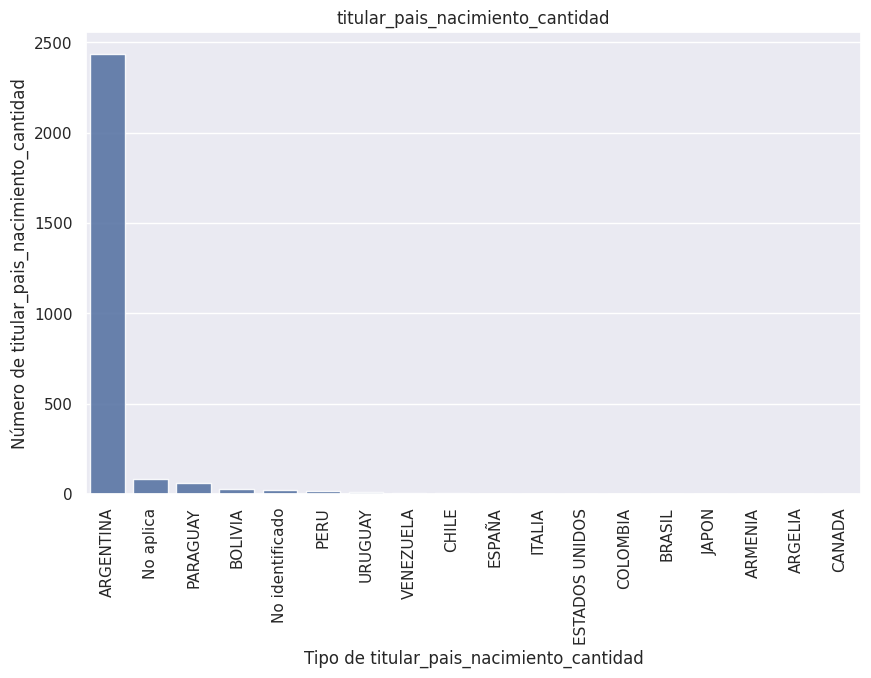

In [36]:
titular_pais_nacimiento_cantidad = df['titular_pais_nacimiento'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=titular_pais_nacimiento_cantidad.index, y=titular_pais_nacimiento_cantidad.values, alpha=0.9)
plt.title('titular_pais_nacimiento_cantidad')
plt.ylabel('Número de titular_pais_nacimiento_cantidad', fontsize=12)
plt.xlabel('Tipo de titular_pais_nacimiento_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

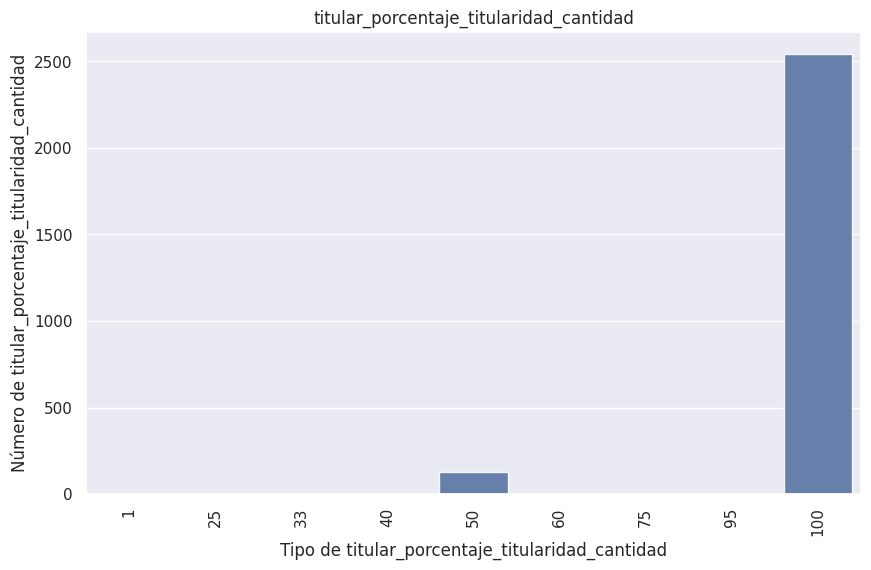

In [37]:
titular_porcentaje_titularidad_cantidad = df['titular_porcentaje_titularidad'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=titular_porcentaje_titularidad_cantidad.index, y=titular_porcentaje_titularidad_cantidad.values, alpha=0.9)
plt.title('titular_porcentaje_titularidad_cantidad')
plt.ylabel('Número de titular_porcentaje_titularidad_cantidad', fontsize=12)
plt.xlabel('Tipo de titular_porcentaje_titularidad_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

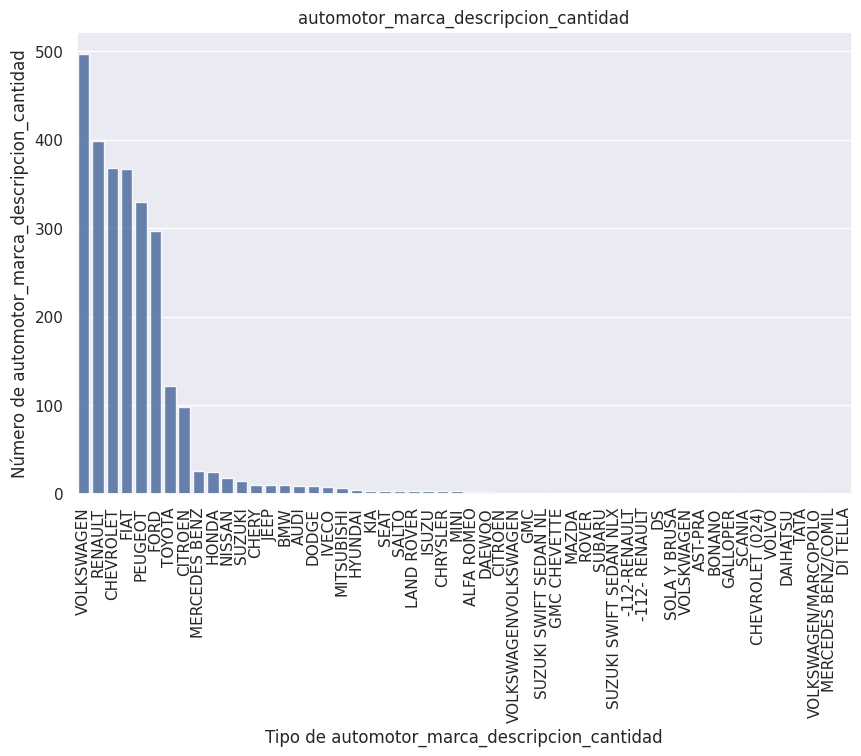

In [38]:
automotor_marca_descripcion_cantidad = df['automotor_marca_descripcion'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=automotor_marca_descripcion_cantidad.index, y=automotor_marca_descripcion_cantidad.values, alpha=0.9)
plt.title('automotor_marca_descripcion_cantidad')
plt.ylabel('Número de automotor_marca_descripcion_cantidad', fontsize=12)
plt.xlabel('Tipo de automotor_marca_descripcion_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

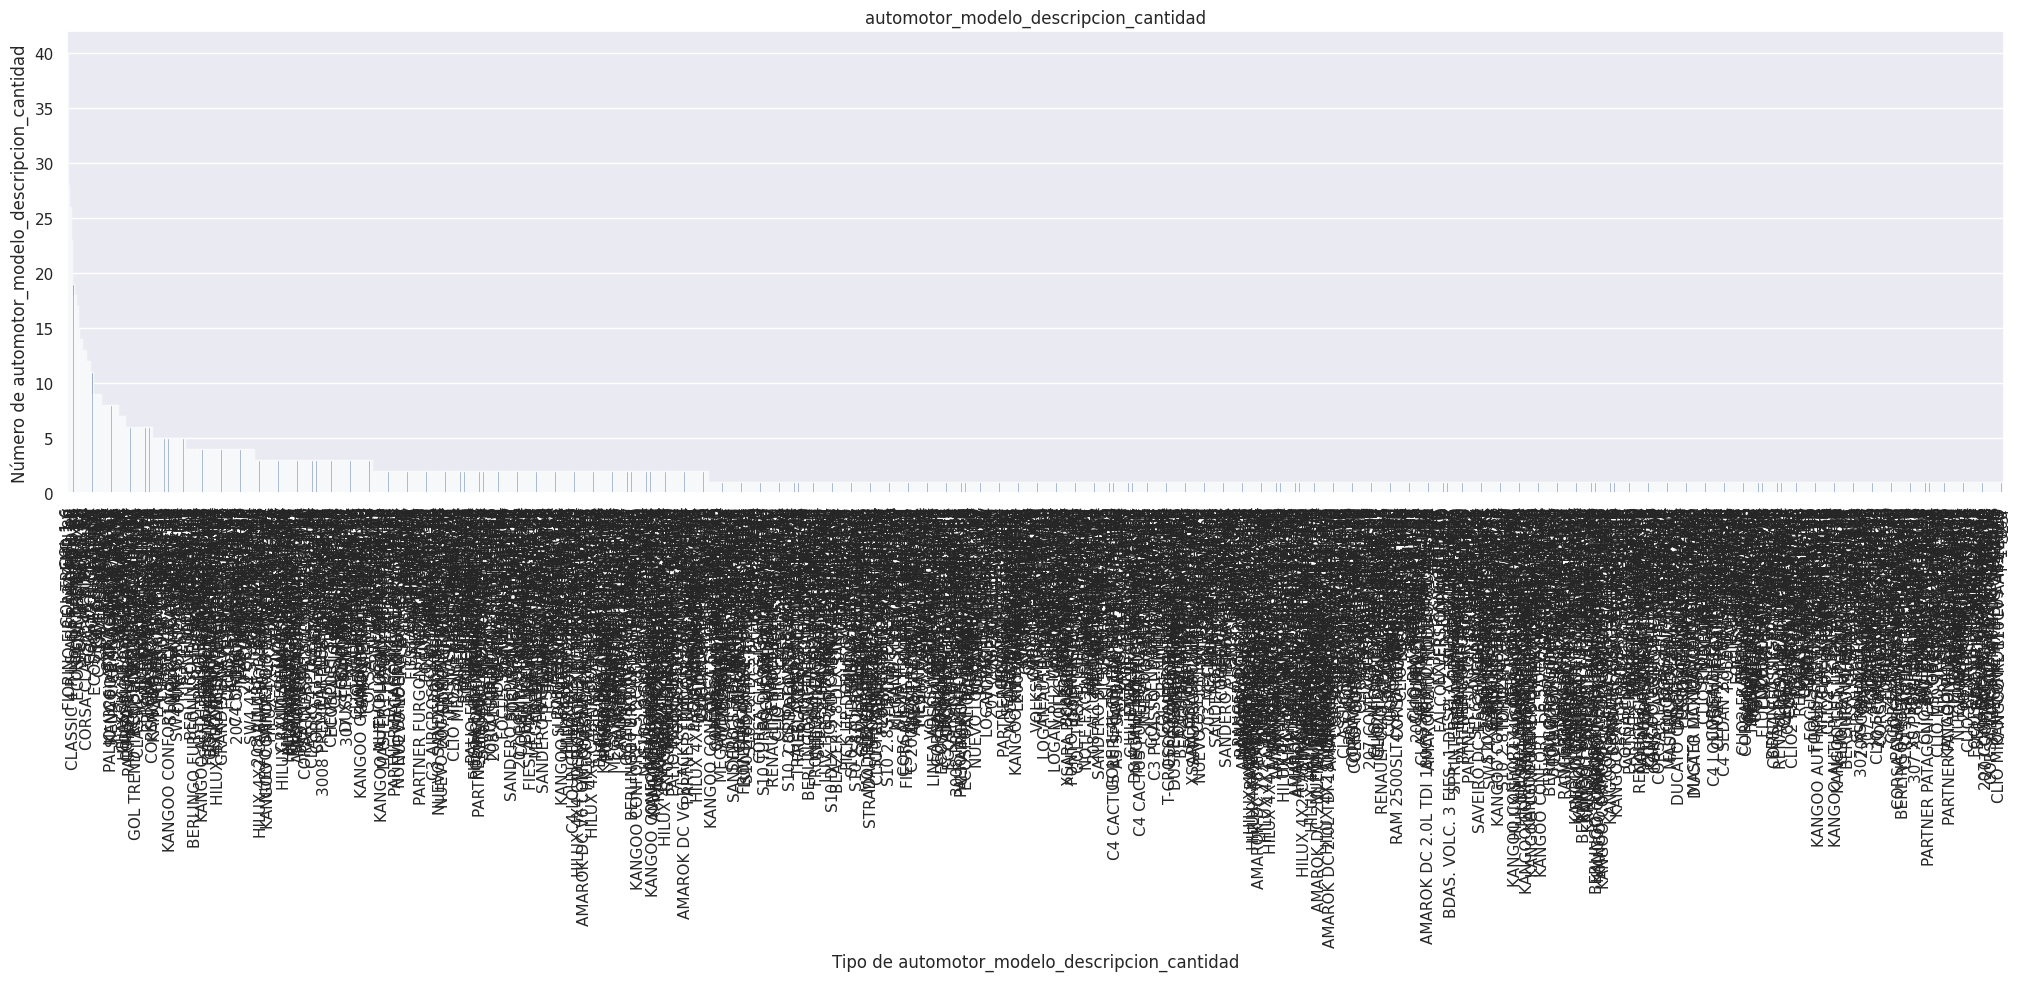

In [39]:
automotor_modelo_descripcion_cantidad = df['automotor_modelo_descripcion'].value_counts()
plt.figure(figsize=(25, 6))
sns.set(style="darkgrid")
sns.barplot(x=automotor_modelo_descripcion_cantidad.index, y=automotor_modelo_descripcion_cantidad.values, alpha=0.9)
plt.title('automotor_modelo_descripcion_cantidad')
plt.ylabel('Número de automotor_modelo_descripcion_cantidad', fontsize=12)
plt.xlabel('Tipo de automotor_modelo_descripcion_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

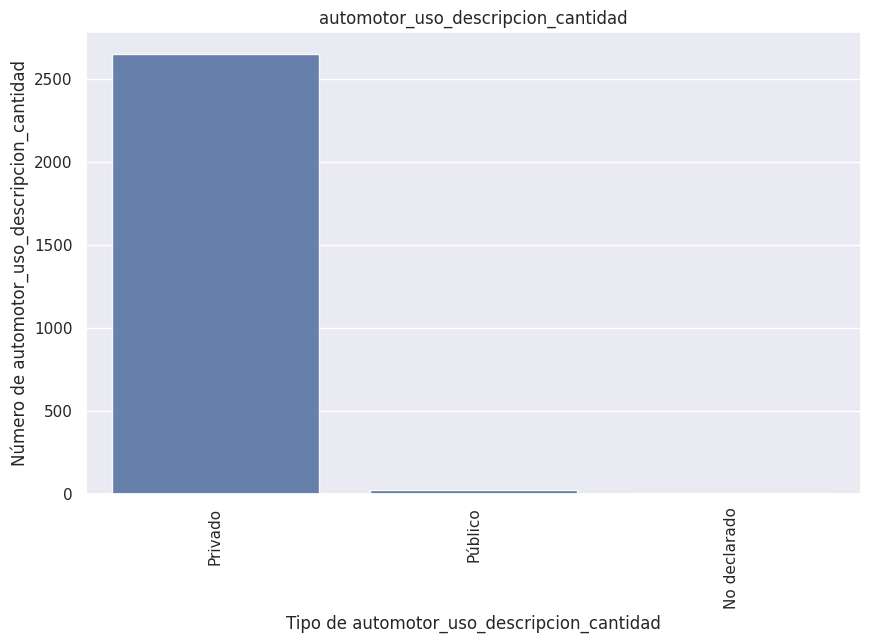

In [40]:
automotor_uso_descripcion_cantidad = df['automotor_uso_descripcion'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=automotor_uso_descripcion_cantidad.index, y=automotor_uso_descripcion_cantidad.values, alpha=0.9)
plt.title('automotor_uso_descripcion_cantidad')
plt.ylabel('Número de automotor_uso_descripcion_cantidad', fontsize=12)
plt.xlabel('Tipo de automotor_uso_descripcion_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

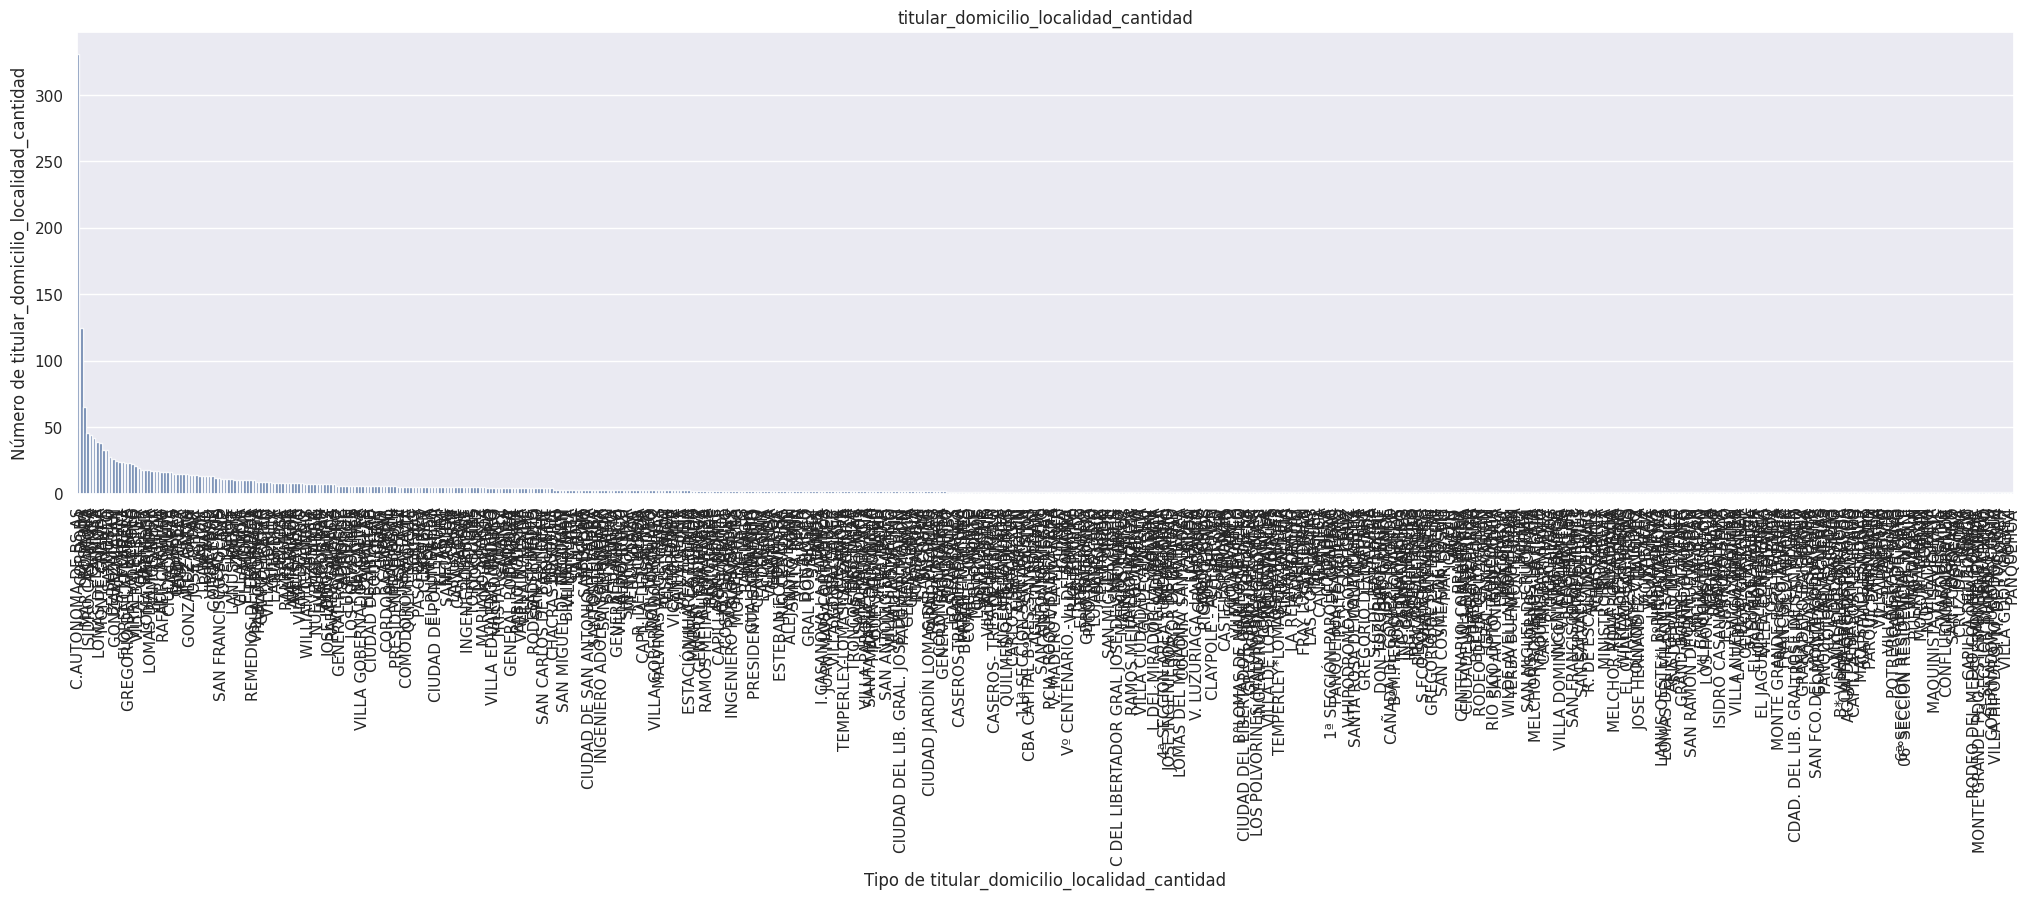

In [41]:
titular_domicilio_localidad_cantidad = df['titular_domicilio_localidad'].value_counts()
plt.figure(figsize=(25, 6))
sns.set(style="darkgrid")
sns.barplot(x=titular_domicilio_localidad_cantidad.index, y=titular_domicilio_localidad_cantidad.values, alpha=0.9)
plt.title('titular_domicilio_localidad_cantidad')
plt.ylabel('Número de titular_domicilio_localidad_cantidad', fontsize=12)
plt.xlabel('Tipo de titular_domicilio_localidad_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

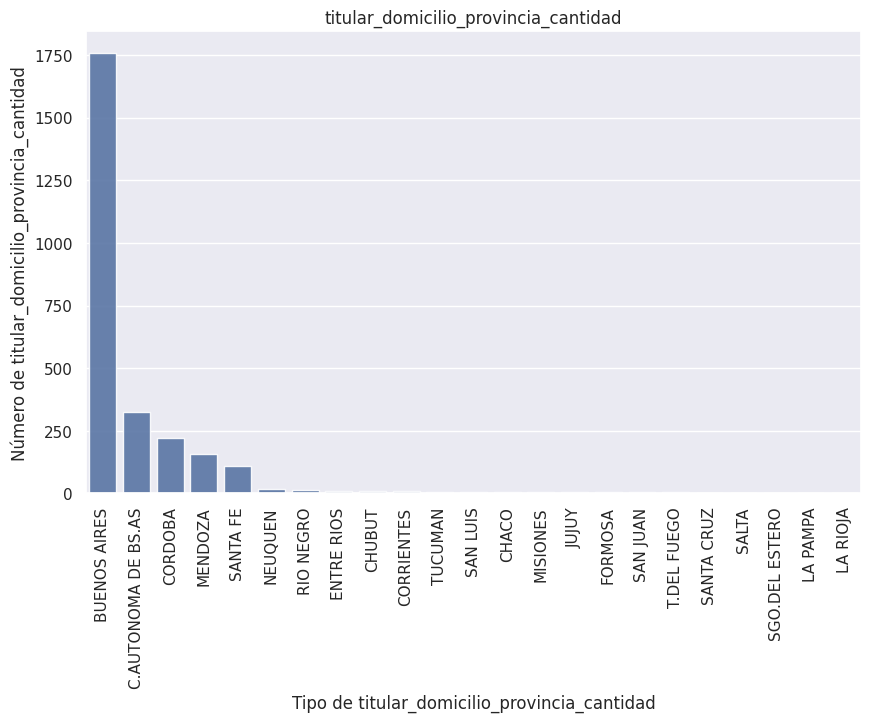

In [42]:
titular_domicilio_provincia_cantidad = df['titular_domicilio_provincia'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=titular_domicilio_provincia_cantidad.index, y=titular_domicilio_provincia_cantidad.values, alpha=0.9)
plt.title('titular_domicilio_provincia_cantidad')
plt.ylabel('Número de titular_domicilio_provincia_cantidad', fontsize=12)
plt.xlabel('Tipo de titular_domicilio_provincia_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

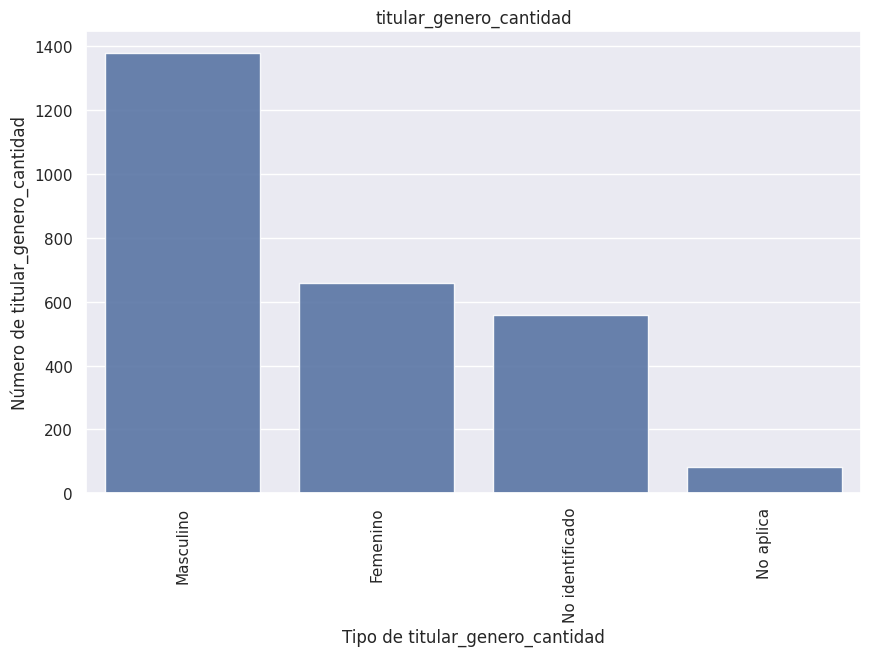

In [43]:
titular_genero_cantidad = df['titular_genero'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=titular_genero_cantidad.index, y=titular_genero_cantidad.values, alpha=0.9)
plt.title('titular_genero_cantidad')
plt.ylabel('Número de titular_genero_cantidad', fontsize=12)
plt.xlabel('Tipo de titular_genero_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

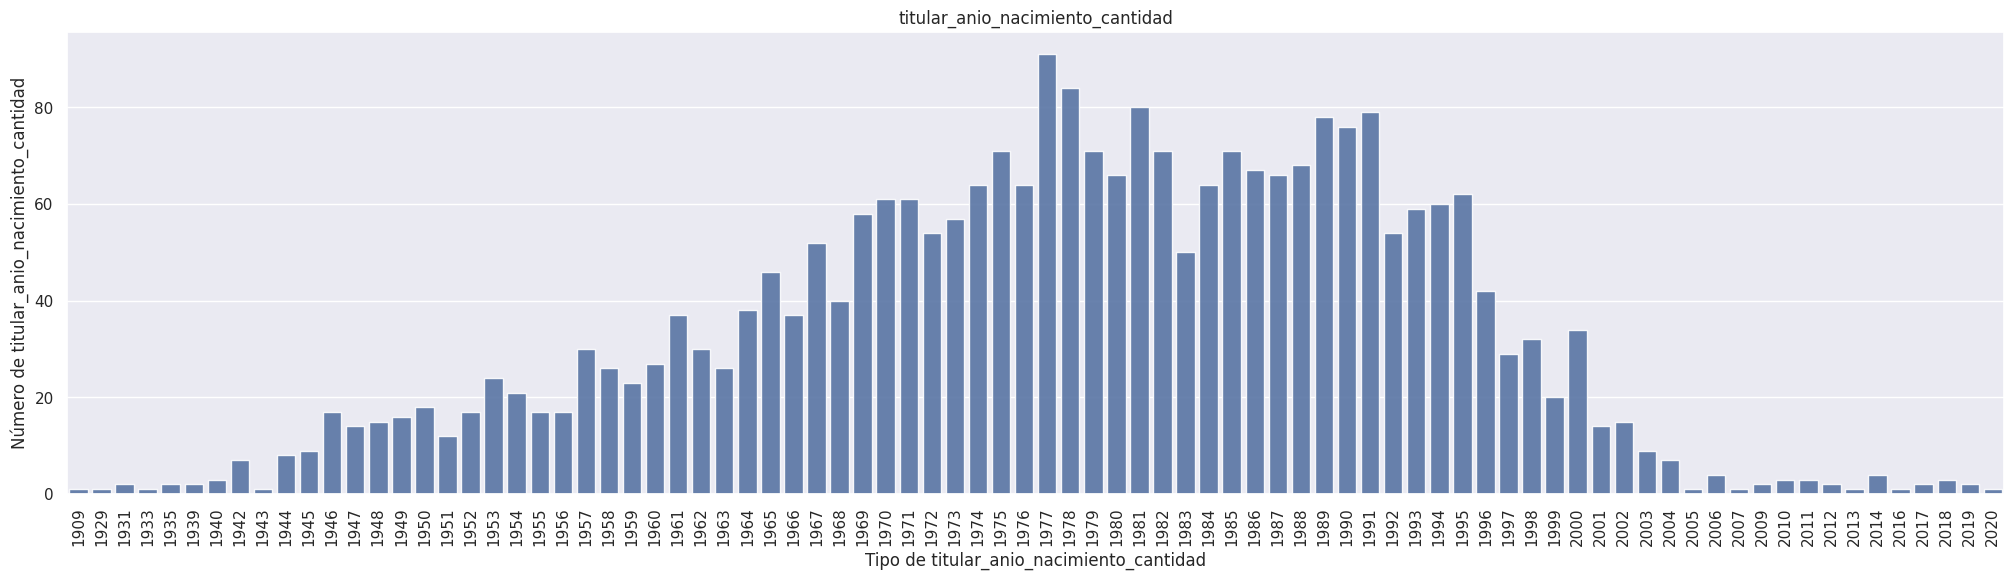

In [44]:
titular_anio_nacimiento_cantidad = df['titular_anio_nacimiento'].value_counts()
plt.figure(figsize=(25, 6))
sns.set(style="darkgrid")
sns.barplot(x=titular_anio_nacimiento_cantidad.index, y=titular_anio_nacimiento_cantidad.values, alpha=0.9)
plt.title('titular_anio_nacimiento_cantidad')
plt.ylabel('Número de titular_anio_nacimiento_cantidad', fontsize=12)
plt.xlabel('Tipo de titular_anio_nacimiento_cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Método de machine learning a aplicar árbol de decisión

In [45]:
# Crear un diccionario con los mapeos de reemplazo para cada dato único
reemplazos_17 = {valor: i for i, valor in enumerate(df['tramite_tipo'].unique())}

# Aplicar el reemplazo a la columna 'tramite_tipo'
df['tramite_tipo'] = df['tramite_tipo'].replace(reemplazos_17)

print(reemplazos_17)

{'DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA': 0, 'COMUNICACIÓN DE RECUPERO': 1}


In [46]:
# Convertir las columnas de fechas a enteros
df['tramite_fecha'] = pd.to_datetime(df['tramite_fecha']).astype(int) // 10**9
df['fecha_inscripcion_inicial'] = pd.to_datetime(df['fecha_inscripcion_inicial']).astype(int) // 10**9

# Verificar los tipos de datos después de la conversión
print(df.dtypes)

tramite_tipo                        int64
tramite_fecha                       int64
fecha_inscripcion_inicial           int64
registro_seccional_codigo           int64
registro_seccional_descripcion     object
registro_seccional_provincia       object
automotor_origen                   object
automotor_anio_modelo             float64
automotor_tipo_codigo              object
automotor_tipo_descripcion         object
automotor_marca_codigo             object
automotor_marca_descripcion        object
automotor_modelo_codigo            object
automotor_modelo_descripcion       object
automotor_uso_codigo                int64
automotor_uso_descripcion          object
titular_tipo_persona               object
titular_domicilio_localidad        object
titular_domicilio_provincia        object
titular_genero                     object
titular_anio_nacimiento             int64
titular_pais_nacimiento            object
titular_porcentaje_titularidad      int64
titular_domicilio_provincia_id    

In [47]:
# Convertir las columnas de fechas a características separadas
df['tramite_fecha'] = pd.to_datetime(df['tramite_fecha'])
df['fecha_inscripcion_inicial'] = pd.to_datetime(df['fecha_inscripcion_inicial'])

df['tramite_fecha_anio'] = df['tramite_fecha'].dt.year
df['tramite_fecha_mes'] = df['tramite_fecha'].dt.month
df['tramite_fecha_dia'] = df['tramite_fecha'].dt.day

df['fecha_inscripcion_inicial_anio'] = df['fecha_inscripcion_inicial'].dt.year
df['fecha_inscripcion_inicial_mes'] = df['fecha_inscripcion_inicial'].dt.month
df['fecha_inscripcion_inicial_dia'] = df['fecha_inscripcion_inicial'].dt.day

# Eliminar las columnas originales de tipo Timestamp
df = df.drop(['tramite_fecha', 'fecha_inscripcion_inicial'], axis=1)

# Verificar los tipos de datos después de la conversión
print(df.dtypes)

tramite_tipo                        int64
registro_seccional_codigo           int64
registro_seccional_descripcion     object
registro_seccional_provincia       object
automotor_origen                   object
automotor_anio_modelo             float64
automotor_tipo_codigo              object
automotor_tipo_descripcion         object
automotor_marca_codigo             object
automotor_marca_descripcion        object
automotor_modelo_codigo            object
automotor_modelo_descripcion       object
automotor_uso_codigo                int64
automotor_uso_descripcion          object
titular_tipo_persona               object
titular_domicilio_localidad        object
titular_domicilio_provincia        object
titular_genero                     object
titular_anio_nacimiento             int64
titular_pais_nacimiento            object
titular_porcentaje_titularidad      int64
titular_domicilio_provincia_id      int64
titular_pais_nacimiento_id         object
anho_tramite_fecha                

In [48]:
# Convertir todas las columnas a float o int
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

# Verificar los tipos de datos después de la conversión
print(df.dtypes)

tramite_tipo                        int64
registro_seccional_codigo           int64
registro_seccional_descripcion      int16
registro_seccional_provincia         int8
automotor_origen                     int8
automotor_anio_modelo             float64
automotor_tipo_codigo                int8
automotor_tipo_descripcion           int8
automotor_marca_codigo               int8
automotor_marca_descripcion          int8
automotor_modelo_codigo             int16
automotor_modelo_descripcion        int16
automotor_uso_codigo                int64
automotor_uso_descripcion            int8
titular_tipo_persona                 int8
titular_domicilio_localidad         int16
titular_domicilio_provincia          int8
titular_genero                       int8
titular_anio_nacimiento             int64
titular_pais_nacimiento              int8
titular_porcentaje_titularidad      int64
titular_domicilio_provincia_id      int64
titular_pais_nacimiento_id           int8
anho_tramite_fecha                

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

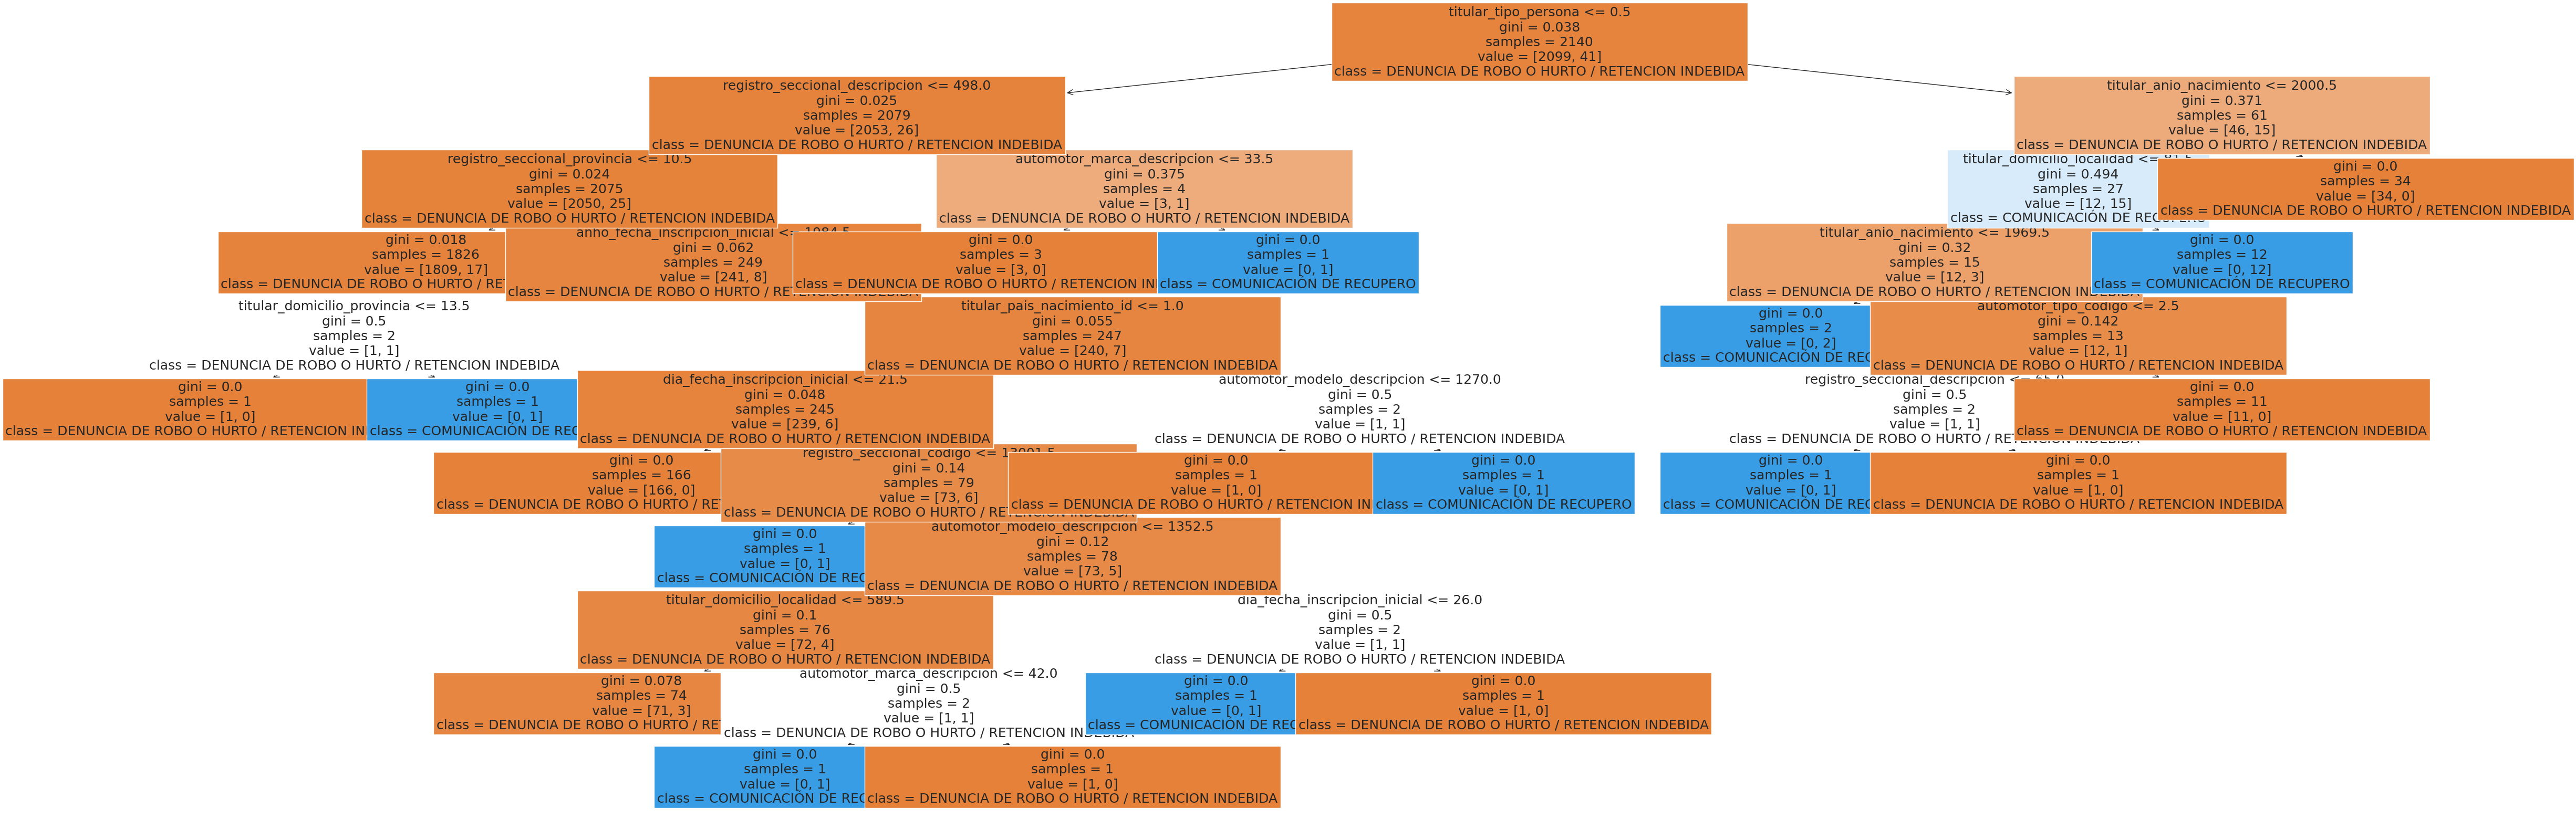

Rendimiento del árbol de decisión con 20 nodos: 0.97


In [50]:
#Paso 1: Dividimos el dataset en entrenamiento y prueba.

X = df.drop('tramite_tipo', axis=1)

y = df['tramite_tipo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Paso 2 = Crear el árbol de decisión con nodos con 20
model = DecisionTreeClassifier(max_leaf_nodes= 20)

#Paso 3 = Ajuste del modelo
model.fit(X_train, y_train)

#Paso 4: Visualizar árbol de decisión
plt.figure(figsize=(60, 20))
plot_tree(model, feature_names=X.columns, class_names=['DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA', 'COMUNICACIÓN DE RECUPERO'], filled=True, fontsize=18)
plt.show()

#Paso 5: Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Paso 6: Evaluar el rendimiento del árbol de decisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del árbol de decisión con 20 nodos: {accuracy:.2f}')

## Método de machine learning a aplicar K-Nearest-Neighbor

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [52]:
#Paso 1: Defininir columnas variables y variable objetivo (Y)

X = df.drop('tramite_tipo', axis=1)

y = df['tramite_tipo']

#Paso 2: Vamos a dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Paso 3 :Escalar los datos para normalizarlos, estandarizarlos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Paso 4: Crear el modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

#Paso 5: Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train_scaled, y_train) #Con x datos normalizados

#Paso 6: Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

# Paso 7: Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo K-Nearest Neighbors: {accuracy:.2f}')

Rendimiento del modelo K-Nearest Neighbors: 0.97


In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

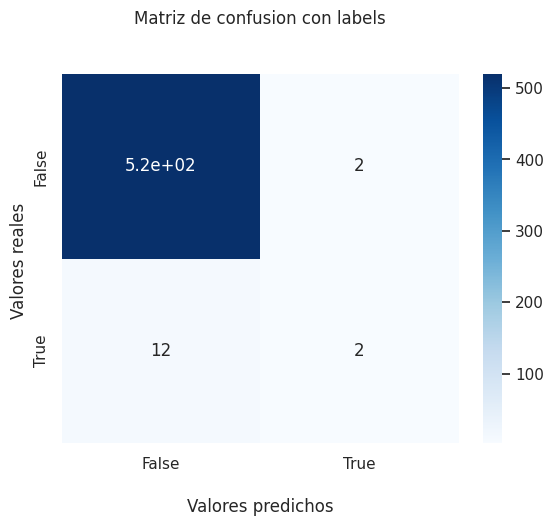

Matriz de Confusión:
[[520   2]
 [ 12   2]]


In [54]:
#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

#Visualización de la matriz
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
print('Matriz de Confusión:')
print(cm)

# Método de machine learning a aplicar random forest

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
X = df.drop('tramite_tipo', axis=1)
y = df['tramite_tipo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo Random Forest: {accuracy:.2f}')

Rendimiento del modelo Random Forest: 0.98


In [70]:
# Reporte de clasificación
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       522
           1       0.75      0.21      0.33        14

    accuracy                           0.98       536
   macro avg       0.86      0.61      0.66       536
weighted avg       0.97      0.98      0.97       536



# Predecir un resultado usando el algoritmo de random forest

In [64]:
prediction = rf_model.predict([[1173, 339, 0, 1, 1994, 4, 74, 16, 8, 53, 1048, 1, 1, 0, 36, 0, 1, 1947, 15, 100, 6, 0, 2022, 1, 31, 2000, 10, 27, 1970, 1, 1, 1970, 1, 1]])
print(f'Predicción: {prediction[0]}')

Predicción: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Conclusión

### Usando la librería de árbol de decisión se puede visualizar de manera gráfica las fiferentes condiciones para poder concluir si un resultado puede ser 'DENUNCIA DE ROBO O HURTO (0) ó RETENCION INDEBIDA' (1) y usando la librería Random Forest se crea un algoritmo que permite ingresando unos valores de unas variables previamnete seleccionadas que resultado puede arrojar si 'DENUNCIA DE ROBO O HURTO (0) ó RETENCION INDEBIDA' (1) con un presición del 98%